TITLE - Optimizing Energy Usage and Predictive Insights: Harnessing Smart Meter Data and Weather Correlations

Smart meters are advanced electronic devices used to measure and record energy consumption.

To supplement the analysis of energy consumption, weather data from reputable sources like the New Zealand Weather Body (NIWA) is integrated into the research design This weather data includes various meteorological variables that can potentially influence energy usage The weather data includes the following relevant attributes: Timestamp: Date and time of the weather observation. Temperature: Ambient temperature in degrees Celsius or Fahrenheit. Humidity: The relative humidity level expressed as a percentage. Other Weather Parameters: Wind speed, precipitation, and other climatic conditions that may impact energy consumption.

-The energy Dataset consists of unique Smart meters

Only 192 Smart Meters have been selected ( Approved by Property Manager )
109 ( University Flats) and 83 ( Residential College )
35 Smart meters did not have Energy data for more than 12 months
98 % of Dataset had energy consumption reading was upto 25th March 2023.
Hence , the Time period will be from 1st Jan 2022 to 25th March 2023
Mean Data Imputation was implemented
Unwanted attributes removed - REGISTER CONTENT
Flat Type (University Flats or Residential College) , Full Address , Building Name , Building Code were added to the energy dataset .
Smart meters comes into 2 types of category 1) University Flats - these are buildings where students stay alone or with their family members
2) Residential College - These are buildings which represents different college under the university with accommodation . hence called as residential college where they teach , students stay , office , store rooms etc 3) The Otago University Smart Meter HHD 15 months.csv file contains the following columns: From Jan 2022 to March 2023 1. Smart Meter Id: Unique identifier for each smart meter. (Alphanumeric) 2. Flats Category: Category of flats where the smart meter is installed. This can be either 'University Flats' or 'Residential College'. (Alphanumeric) 3. Address: Complete address where the smart meter is installed. (Alphanumeric) 4. Street: Street name, used for clustering purposes. (Alphanumeric) 5. Building Name: Name of the building, used for clustering purposes. (Alphanumeric) 6. Building Code: Code assigned to the building. (Alphanumeric) 7. Date: Date when the readings were taken. (Date format) start from 1st Jan 2022 and ends up by 25th March 2023 ( 15 months ) 8. PERIODS: This column classifies each date as either a holiday or term time. Holidays are pre-defined dates like national holidays or weekends, whereas term time refers to regular working or school days. This classification is crucial for analyzing variations in energy consumption patterns during different periods. 9. Seasons: This column indicates the season during which the energy reading was taken. Seasons can affect energy consumption patterns due to varying heating or cooling needs, daylight hours, and other seasonal activities. 10. TotalDailyEnergyConsumption: Total energy consumed in a full day. (Numeric) 11. 00.00-01.00: Energy consumption from 12.00 am to 1.00 am. (Numeric) 12. 01.00-02.00: Energy consumption from 1.00 am to 2.00 am. (Numeric) 13. 02.00-03.00: Energy consumption from 2.00 am to 3.00 am. (Numeric) 14. 03.00-04.00: Energy consumption from 3.00 am to 4.00 am. (Numeric) etc -------------------------------------------------------------------------

Explanation of common weather report columns:
DATE: The date when the weather data was recorded, typically in a day/month/year format. TIME: The time of the weather observation, usually in hours:minutes:seconds format. TEMP: The air temperature, usually measured in degrees Celsius (°C). RH: Relative Humidity, given as a percentage (%), indicating the amount of moisture in the air. WINDSPD: Wind speed, reported in meters per second (m/s). WINDIR: Wind direction, reported in degrees, with 0° or 360° indicating north, 90° east, 180° south, and 270° west. GLOBAL: Global solar radiation, measured in watts per square meter (W/m²), which is the total amount of solar radiation received from the sun, including direct and diffuse radiation. UVA: Ultraviolet A radiation, measured in watts per square meter (W/m²). UVA is less intense but more prevalent than UVB and is associated with skin aging. UVB: Ultraviolet B radiation, also measured in watts per square meter (W/m²). UVB has a shorter wavelength and is associated with sunburn and skin cancer. VISIBLE: The intensity of visible light, measured in micromoles per square meter per second (micromol/m²/s). RAIN: Rainfall amount, typically measured in millimeters (mm). PRESS: Atmospheric pressure, usually in hectopascals (hPa), indicating the weight of the air above. MAXGUST: The maximum gust of wind speed recorded, in meters per second (m/s).

Data Collection:

Smart Meter Data: The project will use the provided smart-metering data to analyze energy

consumption across various University buildings and facilities.

Weather Data: The integration of weather data from reputable sources, such as the New Zealand Weather Body (NIWA), will help explore correlations between energy consumption and meteorological variables like temperature and humidity.

RESEREACH QUESTIONS
A) How can smart meter data be effectively analyzed to uncover patterns and trends in energy consumption across different buildings and facilities within the University of Otago?

B) What are the correlations between energy consumption and weather variables, such as temperature and humidity, and how can they be leveraged to optimize energy management practices?

C) What are the areas of high energy usage, anomalies, and potential inefficiencies within the University's energy systems, and how can energy consumption be accurately predicted by considering weather conditions and specific temporal factors such as day of the week and month?

# Important - the Time Format has been changed in the dataset in both energy as well as Weather csv for merging purpose and hence use this dataset


# Research Question 2 
What are the correlations between energy consumption and weather variables, such as temperature and humidity, and how can they be leveraged to optimize energy management practices?

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy import stats
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from pandas.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)


# Correlation Heatmap between Daily Energy Consumption and Weather Variables Flat Category

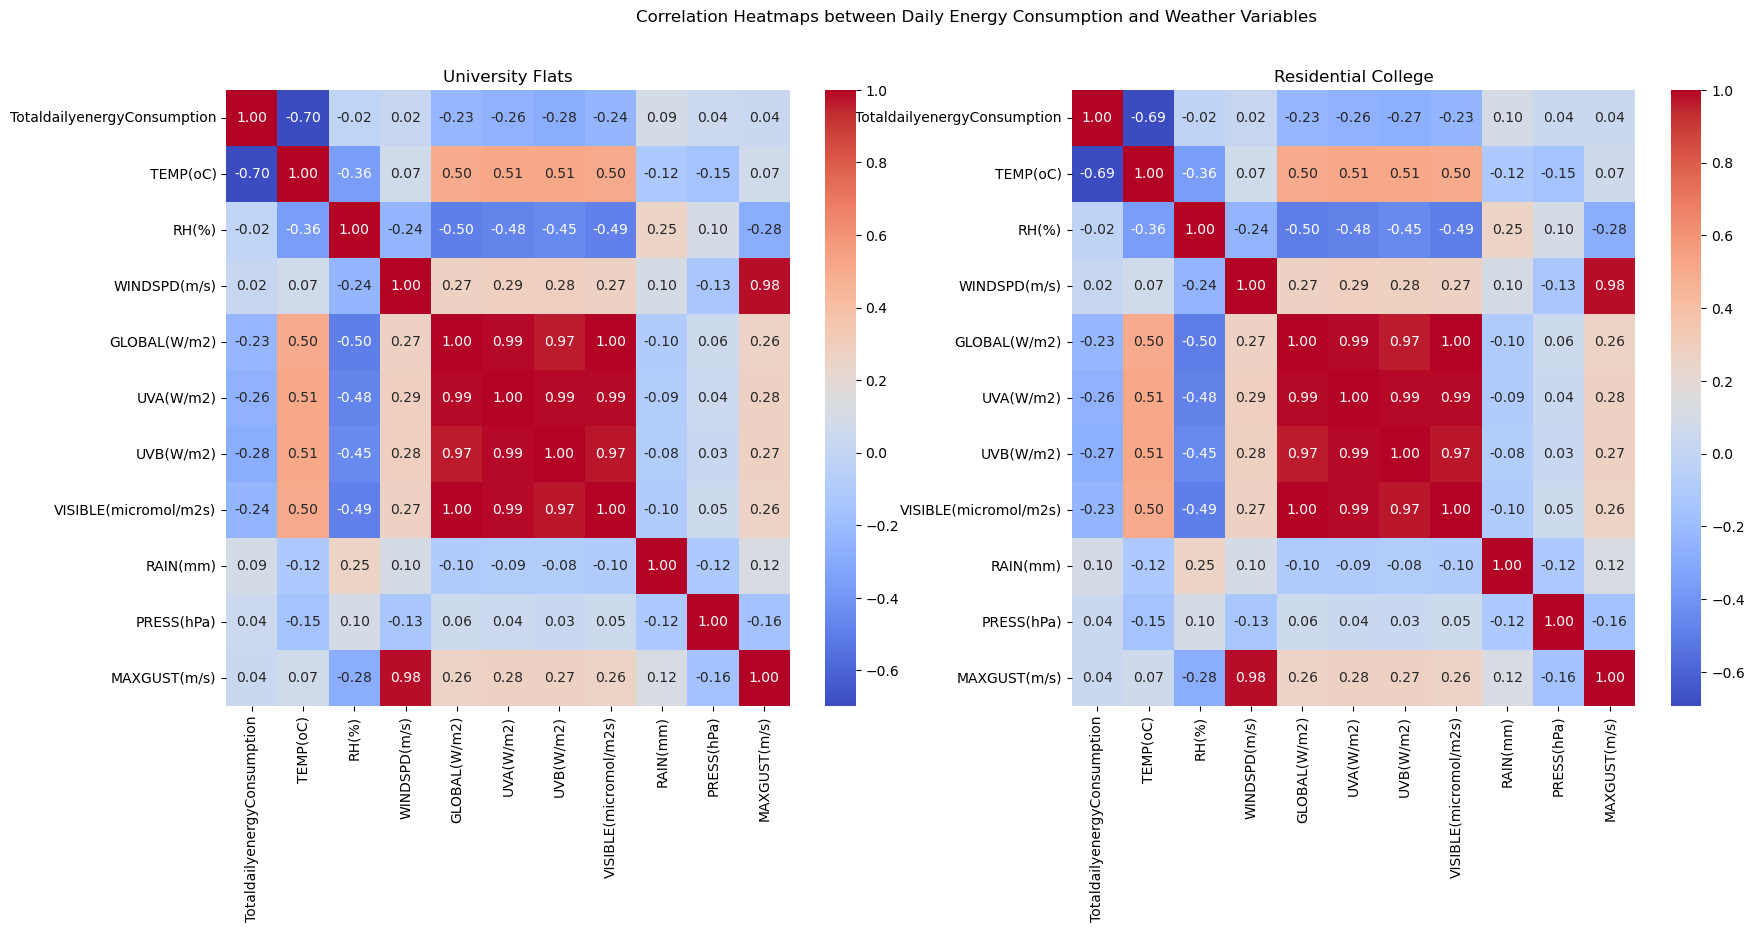

In [39]:


# Convert 'DATE(dd/mm/yy)' to datetime in weather data
weather_data['DATE(dd/mm/yy)'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'], dayfirst=True)

# Function to prepare and get correlation data for a specific flat category
def get_correlation_data(flat_category):
    # Filter and aggregate energy data
    filtered_energy = energy_data[energy_data['Flats Category'] == flat_category].copy()
    filtered_energy['Date'] = pd.to_datetime(filtered_energy['Date'], dayfirst=True)
    daily_energy = filtered_energy.groupby('Date')['TotaldailyenergyConsumption'].sum().reset_index()

    # Merge with weather data
    merged_data = pd.merge(daily_energy, weather_data, left_on='Date', right_on='DATE(dd/mm/yy)')

    # Select relevant columns for correlation, including the new variables
    columns_for_correlation = ['TotaldailyenergyConsumption', 'TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'GLOBAL(W/m2)', 
                               'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)',
                               'MAXGUST(m/s)']
    return merged_data[columns_for_correlation].corr()

# Get correlation data for specific categories
corr_uni_flats = get_correlation_data('University Flats')
corr_res_college = get_correlation_data('Residential College')

# Creating side by side heatmaps
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# University Flats Heatmap
sns.heatmap(corr_uni_flats, annot=True, cmap='coolwarm', fmt=".2f", ax=ax[0])
ax[0].set_title('University Flats')

# Residential College Heatmap
sns.heatmap(corr_res_college, annot=True, cmap='coolwarm', fmt=".2f", ax=ax[1])
ax[1].set_title('Residential College')

plt.suptitle('Correlation Heatmaps between Daily Energy Consumption and Weather Variables')
plt.show()


In [40]:
# STATS VALUES FOR THE ABOVE PLOT 

# Function to calculate correlation coefficient and p-value
def calculate_stats(df):
    df = df.dropna()._get_numeric_data()
    results = []
    
    for i in range(len(df.columns)):
        for j in range(i+1, len(df.columns)):
            var1 = df.columns[i]
            var2 = df.columns[j]
            corr, p_value = stats.pearsonr(df[var1], df[var2])
            results.append([var1, var2, corr, p_value])
    
    stats_df = pd.DataFrame(results, columns=["Variable 1", "Variable 2", "Correlation Coefficient", "P-Value"])
    return stats_df

# Get correlation data for University Flats and Residential College
correlation_data_uni_flats = get_correlation_data('University Flats')
correlation_data_res_college = get_correlation_data('Residential College')

# Calculate the stats for University Flats and Residential College
stats_results_uni_flats = calculate_stats(correlation_data_uni_flats)
stats_results_res_college = calculate_stats(correlation_data_res_college)

# Print the stats
print("Statistical Details for University Flats (Correlation Coefficients and P-Values):")
print(stats_results_uni_flats)
print("\nStatistical Details for Residential College (Correlation Coefficients and P-Values):")
print(stats_results_res_college)


Statistical Details for University Flats (Correlation Coefficients and P-Values):
                     Variable 1             Variable 2  \
0   TotaldailyenergyConsumption               TEMP(oC)   
1   TotaldailyenergyConsumption                  RH(%)   
2   TotaldailyenergyConsumption           WINDSPD(m/s)   
3   TotaldailyenergyConsumption           GLOBAL(W/m2)   
4   TotaldailyenergyConsumption              UVA(W/m2)   
5   TotaldailyenergyConsumption              UVB(W/m2)   
6   TotaldailyenergyConsumption  VISIBLE(micromol/m2s)   
7   TotaldailyenergyConsumption               RAIN(mm)   
8   TotaldailyenergyConsumption             PRESS(hPa)   
9   TotaldailyenergyConsumption           MAXGUST(m/s)   
10                     TEMP(oC)                  RH(%)   
11                     TEMP(oC)           WINDSPD(m/s)   
12                     TEMP(oC)           GLOBAL(W/m2)   
13                     TEMP(oC)              UVA(W/m2)   
14                     TEMP(oC)              UVB

# Comments 

TEMP(oC): Strong negative correlation with energy consumption, indicating a significant drop in energy use as temperatures rise, likely due to less heating required.

RH(%): Slight positive correlation with energy consumption, suggesting a minor impact, possibly from humidity control measures affecting energy use.

WINDSPD(m/s): Very weak negative correlation, showing wind speed has little to no direct effect on energy consumption for the flats.

WINDIR(degrees): Not listed in the correlation coefficients, but wind direction could affect energy use in specific scenarios, such as natural ventilation or wind chill impact on heating needs.

GLOBAL(W/m2): Moderate negative correlation with energy consumption, which could mean that more sunlight leads to less need for artificial lighting and heating.

UVA(W/m2): Similar to GLOBAL radiation, UVA has a moderate negative correlation with energy consumption, again suggesting that increased solar radiation reduces energy use.

UVB(W/m2): As with UVA, UVB shows a moderate negative correlation, aligning with the idea that more sunlight decreases the need for indoor lighting and heating.

VISIBLE(micromol/m2s): Strong positive inter-correlation with other solar radiation measures and moderate negative correlation with energy consumption, in line with the impact of natural light reducing the need for artificial light sources.

RAIN(mm): Very weak correlation with energy consumption, indicating that rainfall has a negligible direct impact on energy use in these settings.

PRESS(hPa): Negative correlation with energy consumption, but not particularly strong, suggesting that atmospheric pressure changes have a minimal direct influence on energy usage.

MAXGUST(m/s): Negligible correlation with energy consumption, indicating that the strength of wind gusts doesn't significantly affect energy use.

Statistical Significance Insights (P-Value):

A p-value less than 0.05 is generally considered statistically significant.
The negative correlations between energy consumption and temperature (TEMP) are statistically significant (p < 0.001) for both flat categories, reinforcing the importance of temperature in energy consumption.
The correlations between energy consumption and solar radiation variables (GLOBAL, UVA, UVB) are also significant (p < 0.05), further highlighting the impact of solar radiation on energy usage.
Most other variables have p-values well above the 0.05 threshold, meaning their correlations with energy consumption are not statistically significant.


In [4]:
# Scatter Plots: Energy Consumption vs Weather Variables for University Flats 

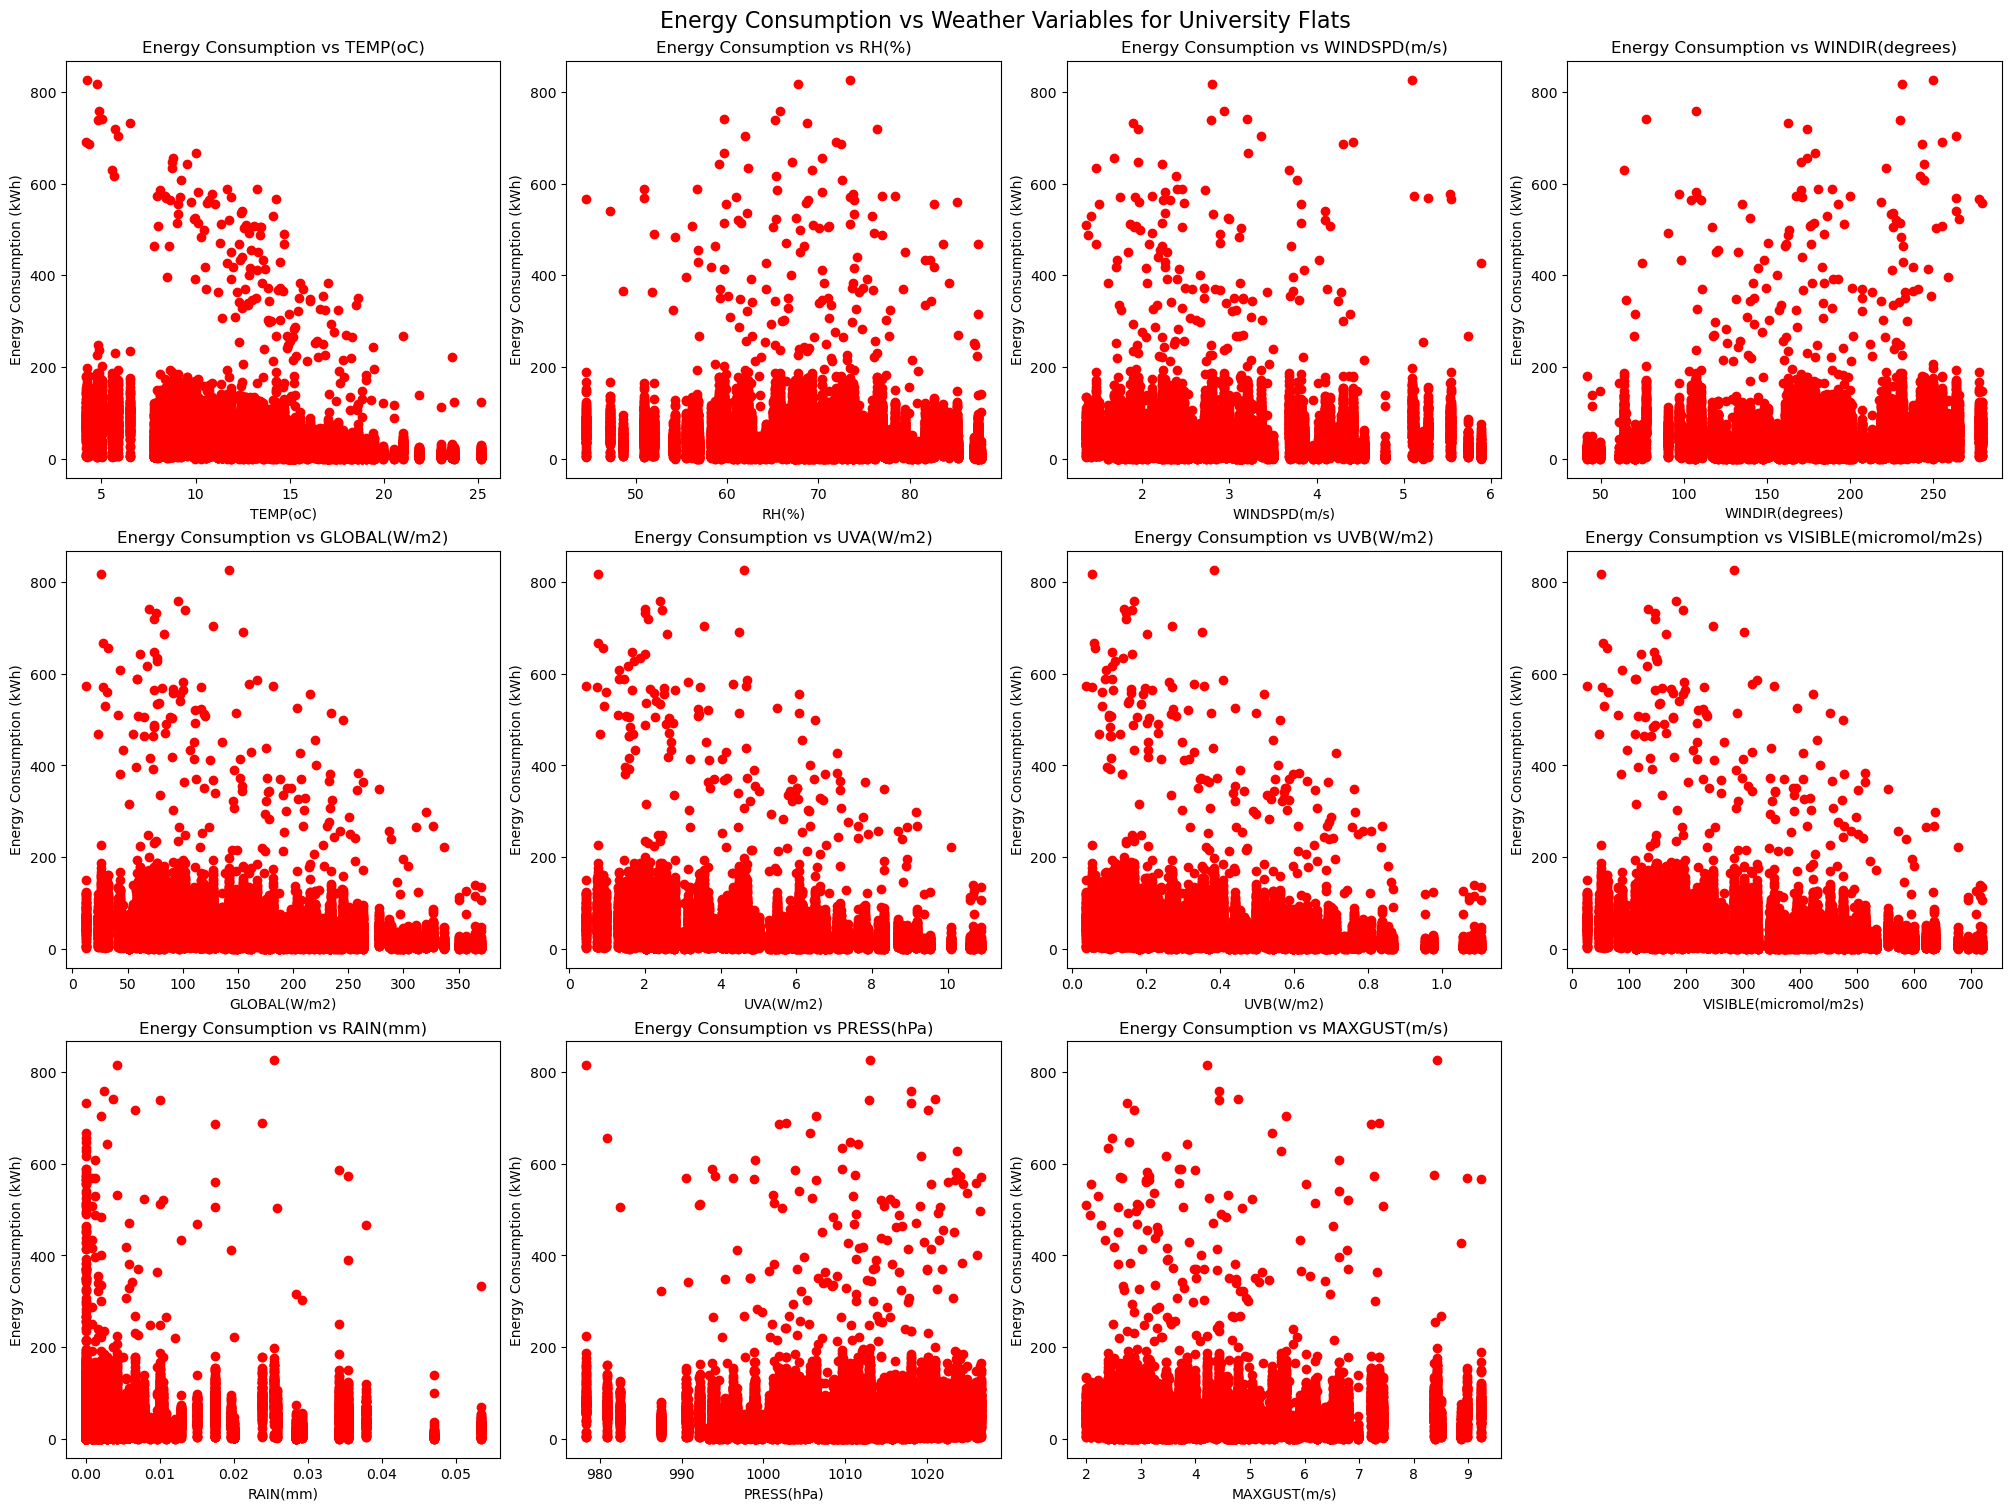

Summary Statistics for Numeric Weather Variables:
           TEMP(oC)         RH(%)  WINDSPD(m/s)  WINDIR(degrees)  \
count  18639.000000  18639.000000  18639.000000     18639.000000   
mean      13.462315     68.722463      2.872239       175.033696   
std        4.108862      8.739585      0.977826        52.637841   
min        4.165417     44.537917      1.360417        41.368333   
25%       10.685833     62.270417      2.150000       138.357500   
50%       13.525833     68.773333      2.707500       177.023750   
75%       16.091667     73.936667      3.426250       219.905833   
max       25.127917     87.833750      5.892500       279.423333   

       GLOBAL(W/m2)     UVA(W/m2)     UVB(W/m2)  VISIBLE(micromol/m2s)  \
count  18639.000000  18639.000000  18639.000000           18639.000000   
mean     155.282171      4.686367      0.417907             308.399715   
std       83.225050      2.571387      0.255437             165.558934   
min       11.986250      0.445000      0.

In [41]:
# Scatter Plots: Energy Consumption vs Weather Variables for University Flats 


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing steps to prepare the data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], errors='coerce')
weather_data['Date'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'], errors='coerce')

# Filtering out non-numeric columns from weather data to prevent aggregation errors
numeric_weather_cols = weather_data.select_dtypes(include=['float64', 'int64']).columns
weather_data_daily = weather_data.groupby('Date')[numeric_weather_cols].mean().reset_index()

# Filter energy data for 'University Flats' category and merge with daily weather data
university_flats_energy_data = energy_data[energy_data['Flats Category'] == 'University Flats']
merged_data = pd.merge(university_flats_energy_data, weather_data_daily, on='Date')

# Calculate the mean and standard deviation for the numeric weather variables
means = merged_data[numeric_weather_cols].mean()
stds = merged_data[numeric_weather_cols].std()

# Identify and filter out outliers beyond +/- 3 standard deviations
outliers = (merged_data[numeric_weather_cols] - means).abs() > 3 * stds
merged_data_filtered = merged_data[~outliers.any(axis=1)]

# Plotting the scatter plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), constrained_layout=True)
axes = axes.ravel()

for i, col in enumerate(numeric_weather_cols):
    if i < len(axes):
        ax = axes[i]
        ax.scatter(merged_data_filtered[col], merged_data_filtered['TotaldailyenergyConsumption'], color='red') 
        ax.set_title(f'Energy Consumption vs {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Energy Consumption (kWh)')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Add a title to the entire figure
fig.suptitle('Energy Consumption vs Weather Variables for University Flats', fontsize=16)
    
plt.show()

# Summary statistics for numeric weather variables
summary_stats = merged_data_filtered[numeric_weather_cols].describe()

# Print summary statistics
print("Summary Statistics for Numeric Weather Variables:")
print(summary_stats)


# Comments

Scatter plots reveal a significant inverse relationship between temperature and energy consumption, with higher temps leading to reduced use. Solar radiation measures, including GLOBAL, UVA, UVB, and visible light, also trend towards lower energy consumption as they increase. Wind speed, direction, rainfall, atmospheric pressure, and gust factors exhibit no clear influence on energy usage, underscoring their negligible impact in this context.

General Data Insights:
The most impactful weather variables on energy consumption are those related to temperature and solar radiation. These should be the focus of energy efficiency measures and predictive modeling.

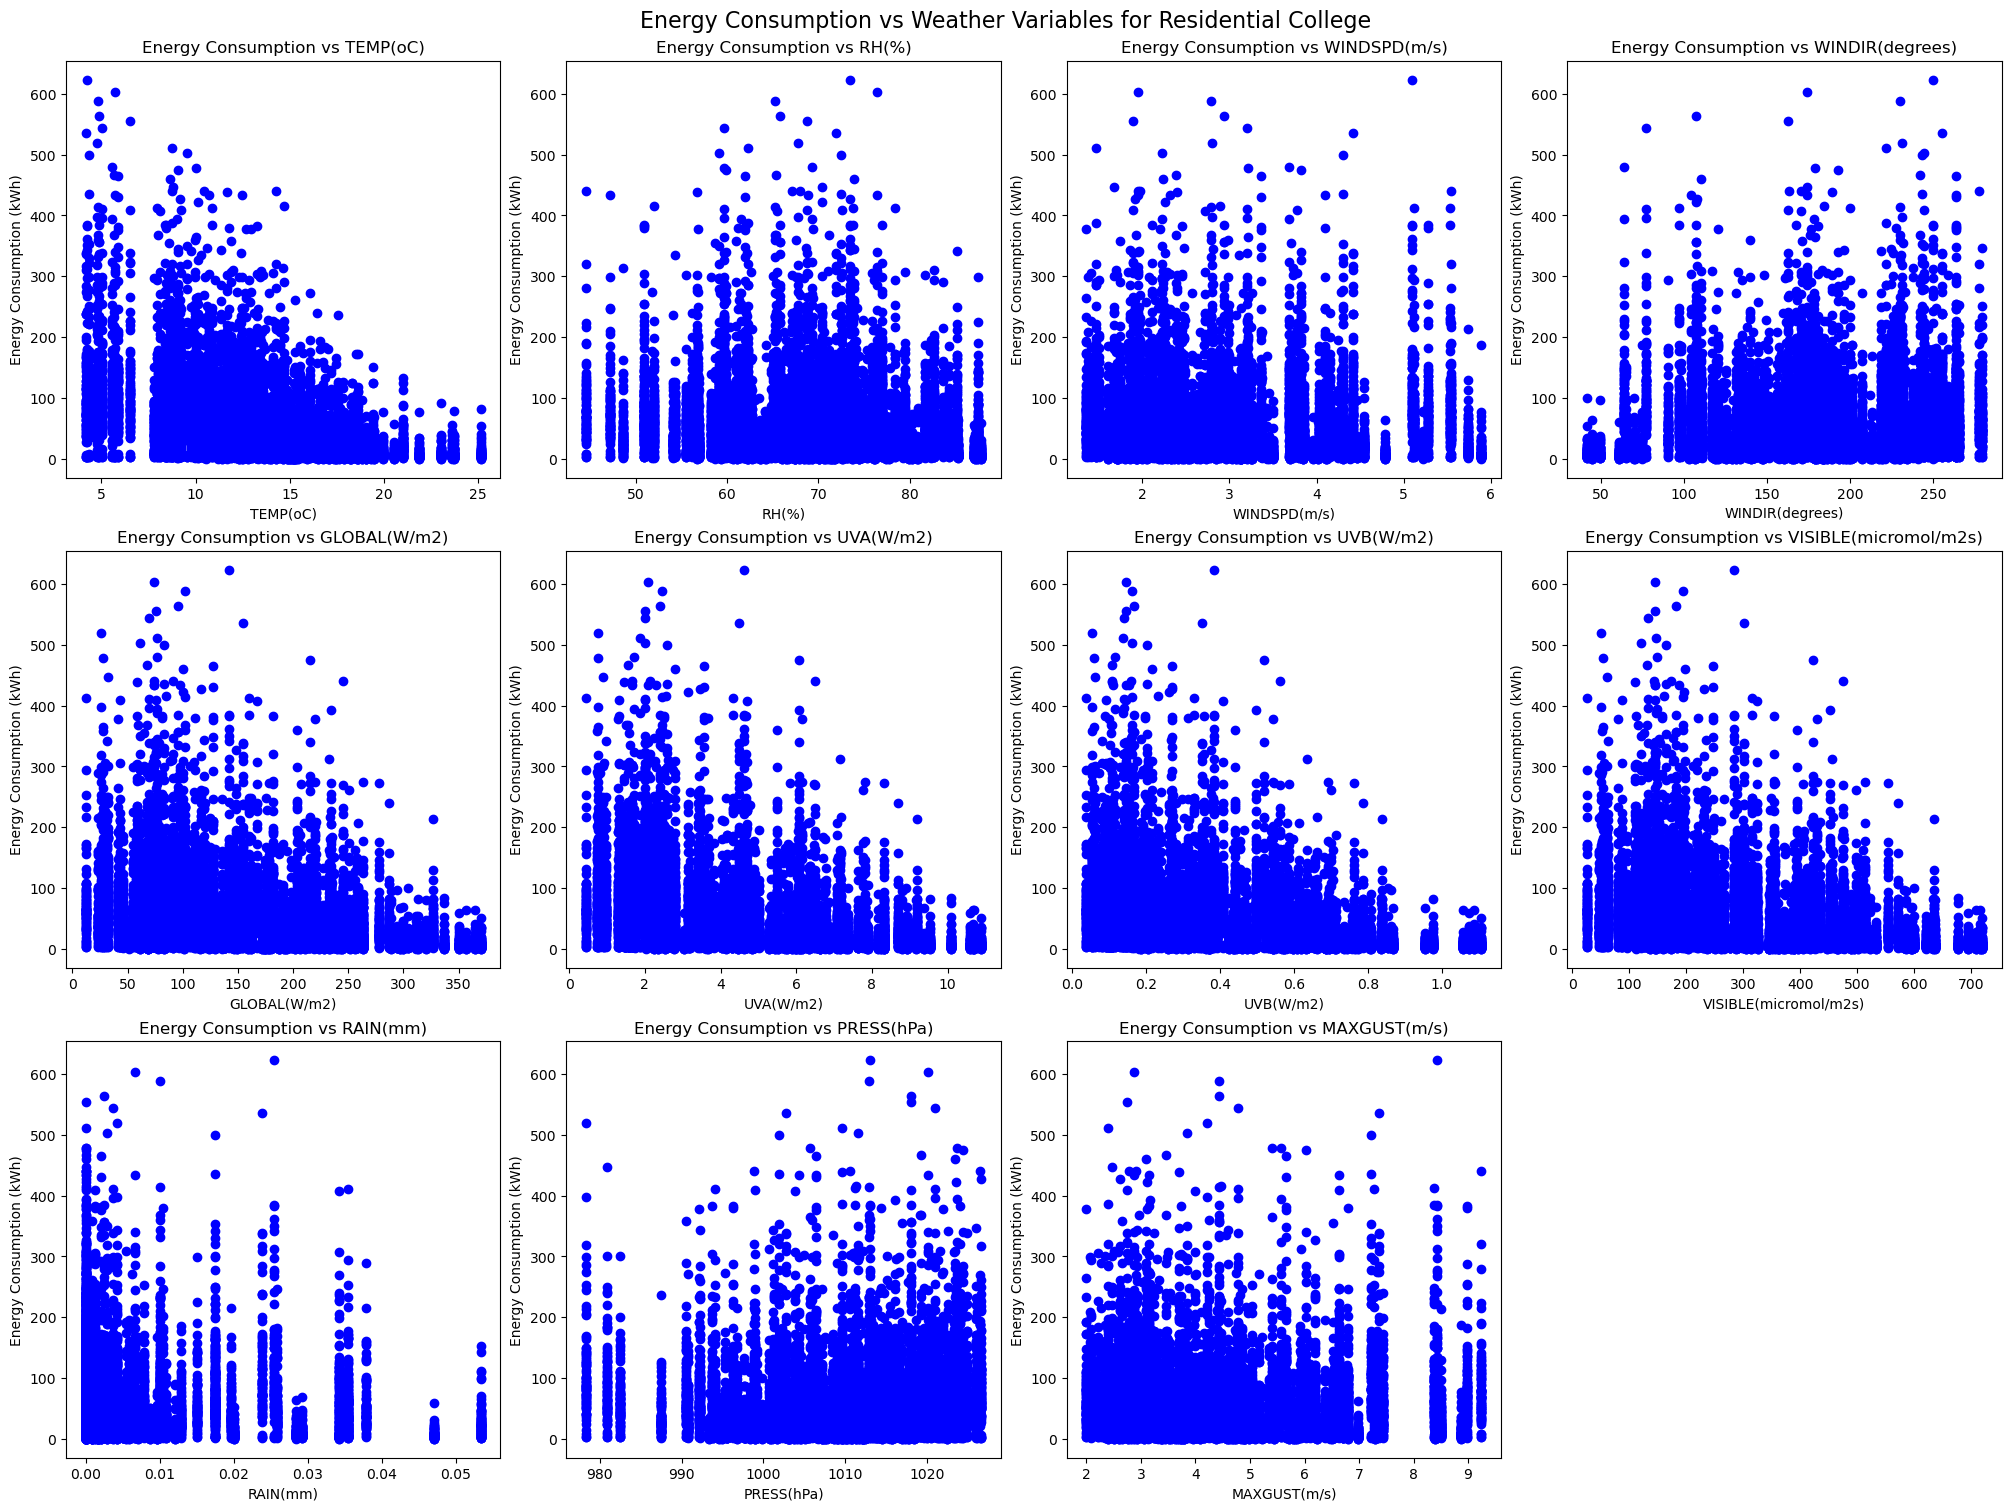

Summary Statistics for Numeric Weather Variables:
           TEMP(oC)         RH(%)  WINDSPD(m/s)  WINDIR(degrees)  \
count  14193.000000  14193.000000  14193.000000     14193.000000   
mean      13.462315     68.722463      2.872239       175.033696   
std        4.108897      8.739658      0.977835        52.638284   
min        4.165417     44.537917      1.360417        41.368333   
25%       10.685833     62.270417      2.150000       138.357500   
50%       13.525833     68.773333      2.707500       177.023750   
75%       16.091667     73.936667      3.426250       219.905833   
max       25.127917     87.833750      5.892500       279.423333   

       GLOBAL(W/m2)     UVA(W/m2)     UVB(W/m2)  VISIBLE(micromol/m2s)  \
count  14193.000000  14193.000000  14193.000000           14193.000000   
mean     155.282171      4.686367      0.417907             308.399715   
std       83.225749      2.571409      0.255440             165.560326   
min       11.986250      0.445000      0.

In [42]:
# Scatter Plots: Energy Consumption vs Weather Variables for Residential College 


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing steps to prepare the data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], errors='coerce')
weather_data['Date'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'], errors='coerce')

# Filtering out non-numeric columns from weather data to prevent aggregation errors
numeric_weather_cols = weather_data.select_dtypes(include=['float64', 'int64']).columns
weather_data_daily = weather_data.groupby('Date')[numeric_weather_cols].mean().reset_index()

# Filter energy data for 'University Flats' category and merge with daily weather data
university_flats_energy_data = energy_data[energy_data['Flats Category'] == 'Residential College']
merged_data = pd.merge(university_flats_energy_data, weather_data_daily, on='Date')

# Calculate the mean and standard deviation for the numeric weather variables
means = merged_data[numeric_weather_cols].mean()
stds = merged_data[numeric_weather_cols].std()

# Identify and filter out outliers beyond +/- 3 standard deviations
outliers = (merged_data[numeric_weather_cols] - means).abs() > 3 * stds
merged_data_filtered = merged_data[~outliers.any(axis=1)]

# Plotting the scatter plots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15), constrained_layout=True)
axes = axes.ravel()

for i, col in enumerate(numeric_weather_cols):
    if i < len(axes):
        ax = axes[i]
        ax.scatter(merged_data_filtered[col], merged_data_filtered['TotaldailyenergyConsumption'], color='blue') 
        ax.set_title(f'Energy Consumption vs {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Energy Consumption (kWh)')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Add a title to the entire figure
fig.suptitle('Energy Consumption vs Weather Variables for Residential College', fontsize=16)
    
plt.show()

# Summary statistics for numeric weather variables
summary_stats = merged_data_filtered[numeric_weather_cols].describe()

# Print summary statistics
print("Summary Statistics for Numeric Weather Variables:")
print(summary_stats)


# Comparative Analysis of Energy Consumption and Weather Variables at University Flats (7-Day Moving Averages)

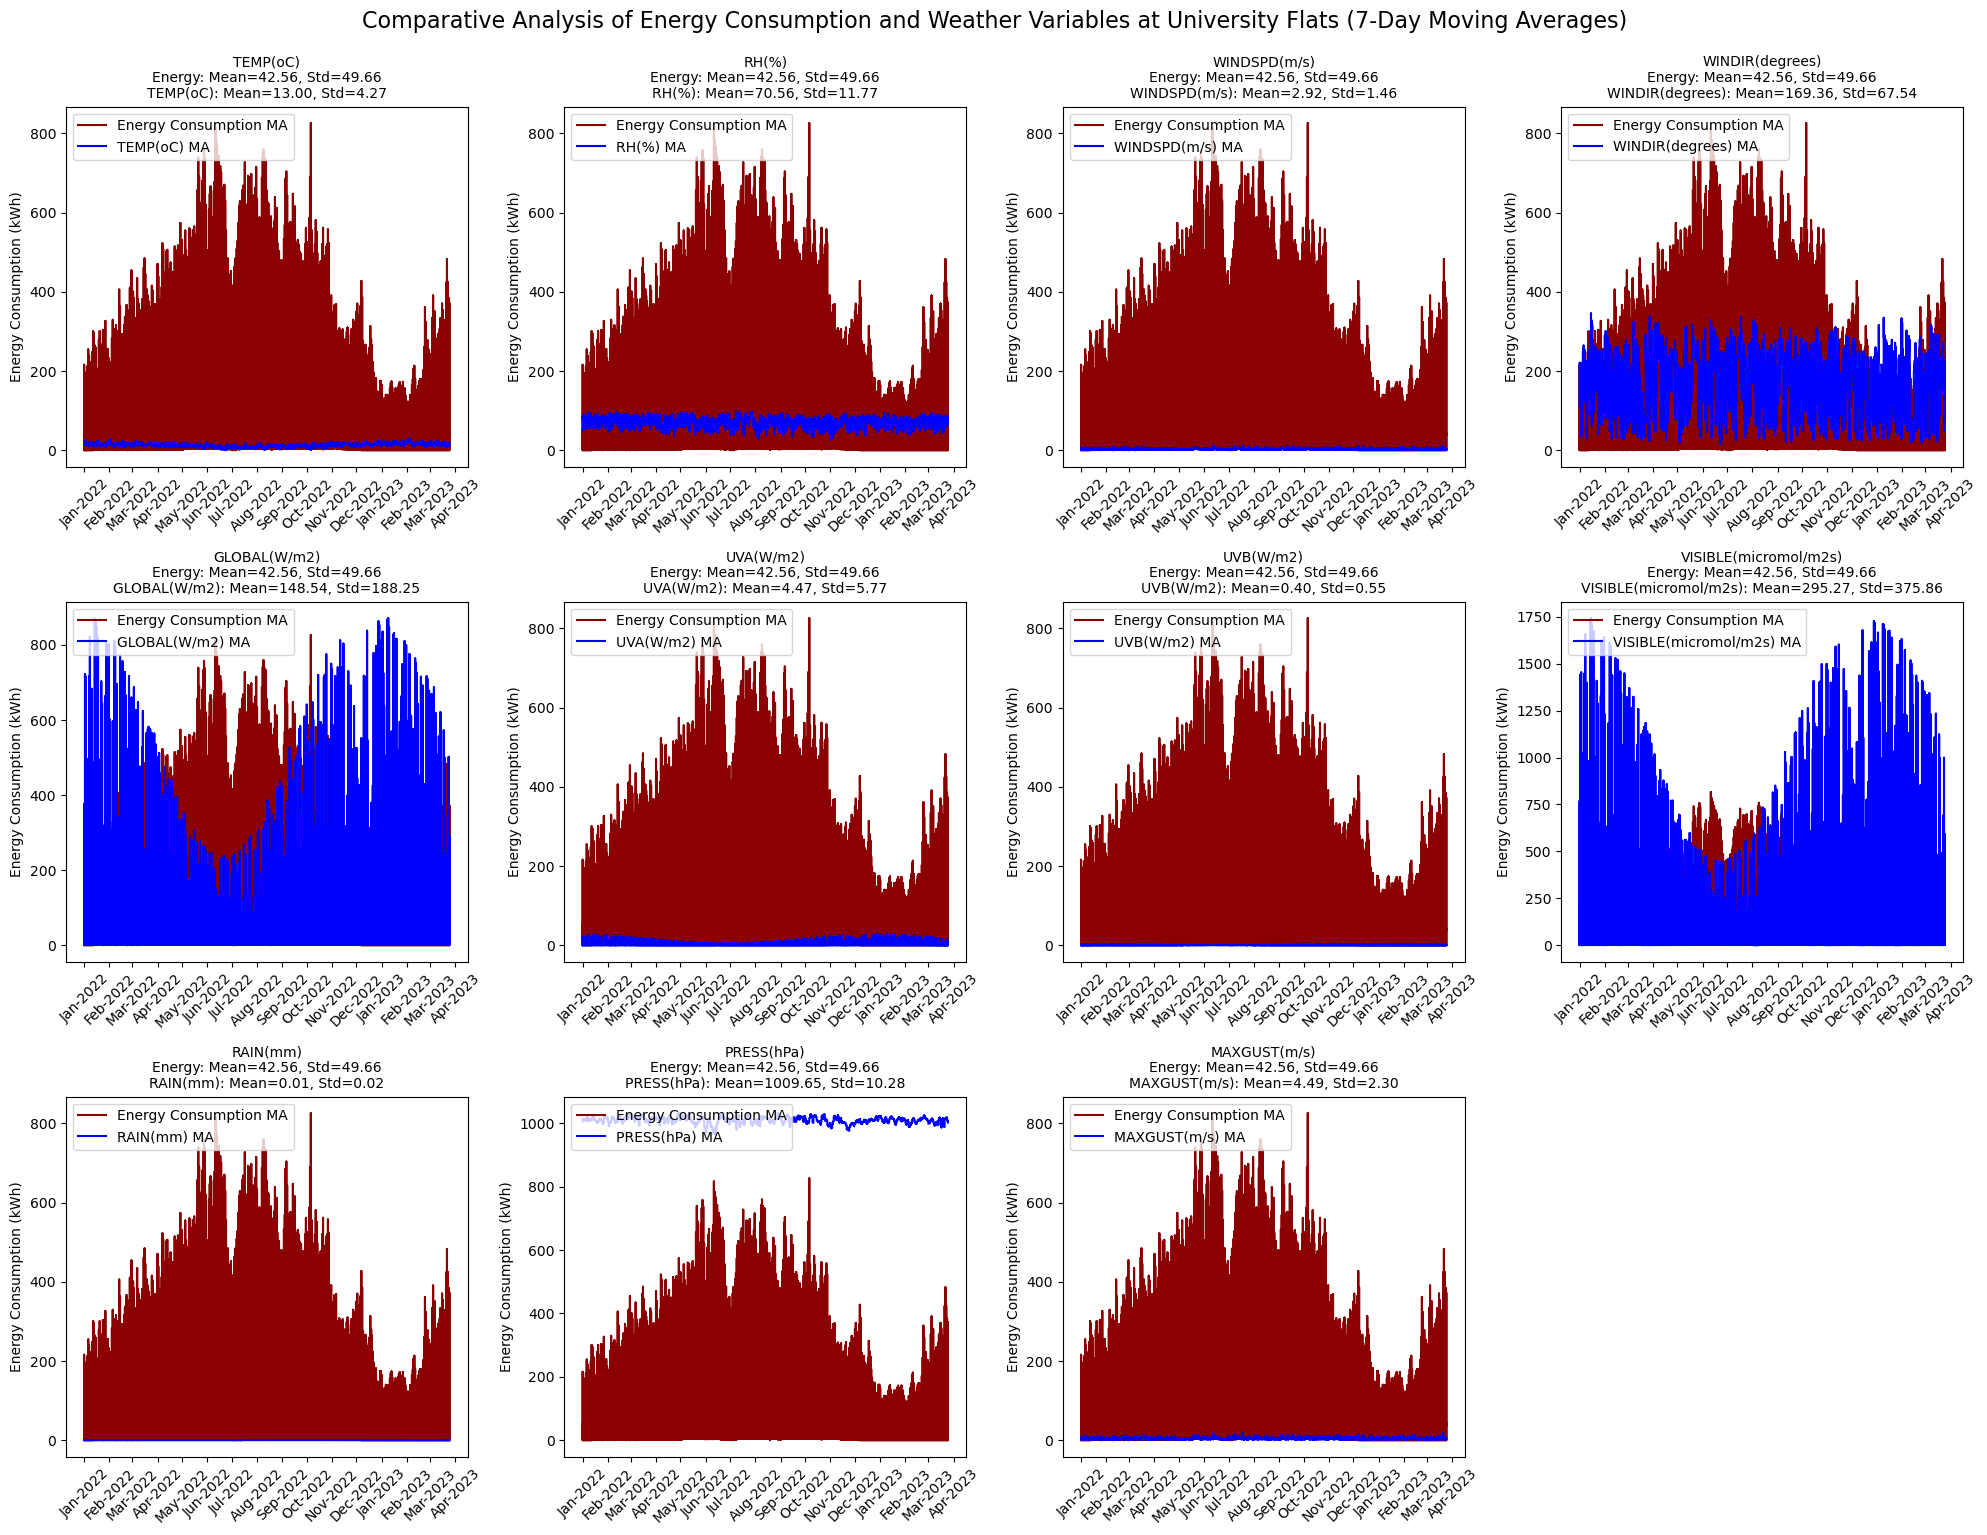

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Convert the date columns to datetime
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
weather_data['Date'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'], format='%d/%m/%Y')

# Merge the datasets on the 'Date' column
merged_data = pd.merge(energy_data, weather_data, on='Date', how='inner')

# Filter for 'University Flats' category in the energy dataset and create a copy
university_flats_data = merged_data[merged_data['Flats Category'] == 'University Flats'].copy()

# Choose a window size for moving average
window_size = 7  # 7 days

# Set up the subplot figure (3 rows, 4 columns)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# List of weather variables
weather_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Calculate moving averages and plot each weather variable
for i, var in enumerate(weather_vars):
    university_flats_data[f'{var} MA'] = university_flats_data[var].rolling(window=window_size).mean()

    # Energy Consumption Moving Average
    energy_ma = university_flats_data['TotaldailyenergyConsumption'].rolling(window=window_size).mean()
    
    # Plot energy consumption
    axes[i].plot(university_flats_data['Date'], energy_ma, color='darkred', label='Energy Consumption MA')
    axes[i].set_ylabel('Energy Consumption (kWh)')
    
    # Plot weather variable
    weather_ma = university_flats_data[f'{var} MA']
    axes[i].plot(university_flats_data['Date'], weather_ma, color='blue', label=f'{var} MA')

    # Calculate statistics
    energy_stats = energy_ma.describe()
    weather_stats = weather_ma.describe()

    # Set title with statistics
    title = f'{var}\nEnergy: Mean={energy_stats["mean"]:.2f}, Std={energy_stats["std"]:.2f}\n'
    title += f'{var}: Mean={weather_stats["mean"]:.2f}, Std={weather_stats["std"]:.2f}'
    axes[i].set_title(title, fontsize=10)

    axes[i].legend(loc='upper left')
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    plt.setp(axes[i].get_xticklabels(), rotation=45)

# Hide the last subplot (which is empty)
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()

# Overall Title
plt.suptitle('Comparative Analysis of Energy Consumption and Weather Variables at University Flats (7-Day Moving Averages)', fontsize=16, y=1.02)

plt.show()


# Comments
Temperature: Temperature swings influence energy use, with its mean and standard deviation hinting at higher energy demands during extreme temperatures for heating or cooling.

Relative Humidity: Relative humidity shows minor impact on energy consumption, as the statistics don’t indicate significant variability correlating with energy use.

Wind Speed: Wind speed has little effect on energy consumption; its consistent standard deviation suggests other factors are more influential.

Wind Direction: Variations in wind direction are not mirrored in energy usage patterns, indicating a negligible impact on overall energy demand.

Global Solar Radiation: A higher mean in global solar radiation suggests potential for reduced energy consumption, possibly due to less need for artificial lighting and heating.

UVA: UVA radiation shows moderate levels and variance, implying a limited influence on the energy consumption of the flats.

UVB: UVB levels, with low mean and standard deviation, suggest minimal direct impact on daily energy usage patterns.

Visibility: Despite high variability in visibility, there is no clear connection to significant changes in energy consumption.

Rainfall: Rainfall's low mean and standard deviation indicate it's a non-significant factor in the context of energy consumption.

Atmospheric Pressure: Atmospheric pressure maintains a stable profile with no evident link to changes in energy consumption.

Maximum Wind Gust: Maximum gust speeds, while occasionally high, do not show a strong correlation with energy usage, as indicated by the steady mean and standard deviation.

# Comparative Analysis of Energy Consumption and Weather Variables at Residential College (7-Day Moving Averages)

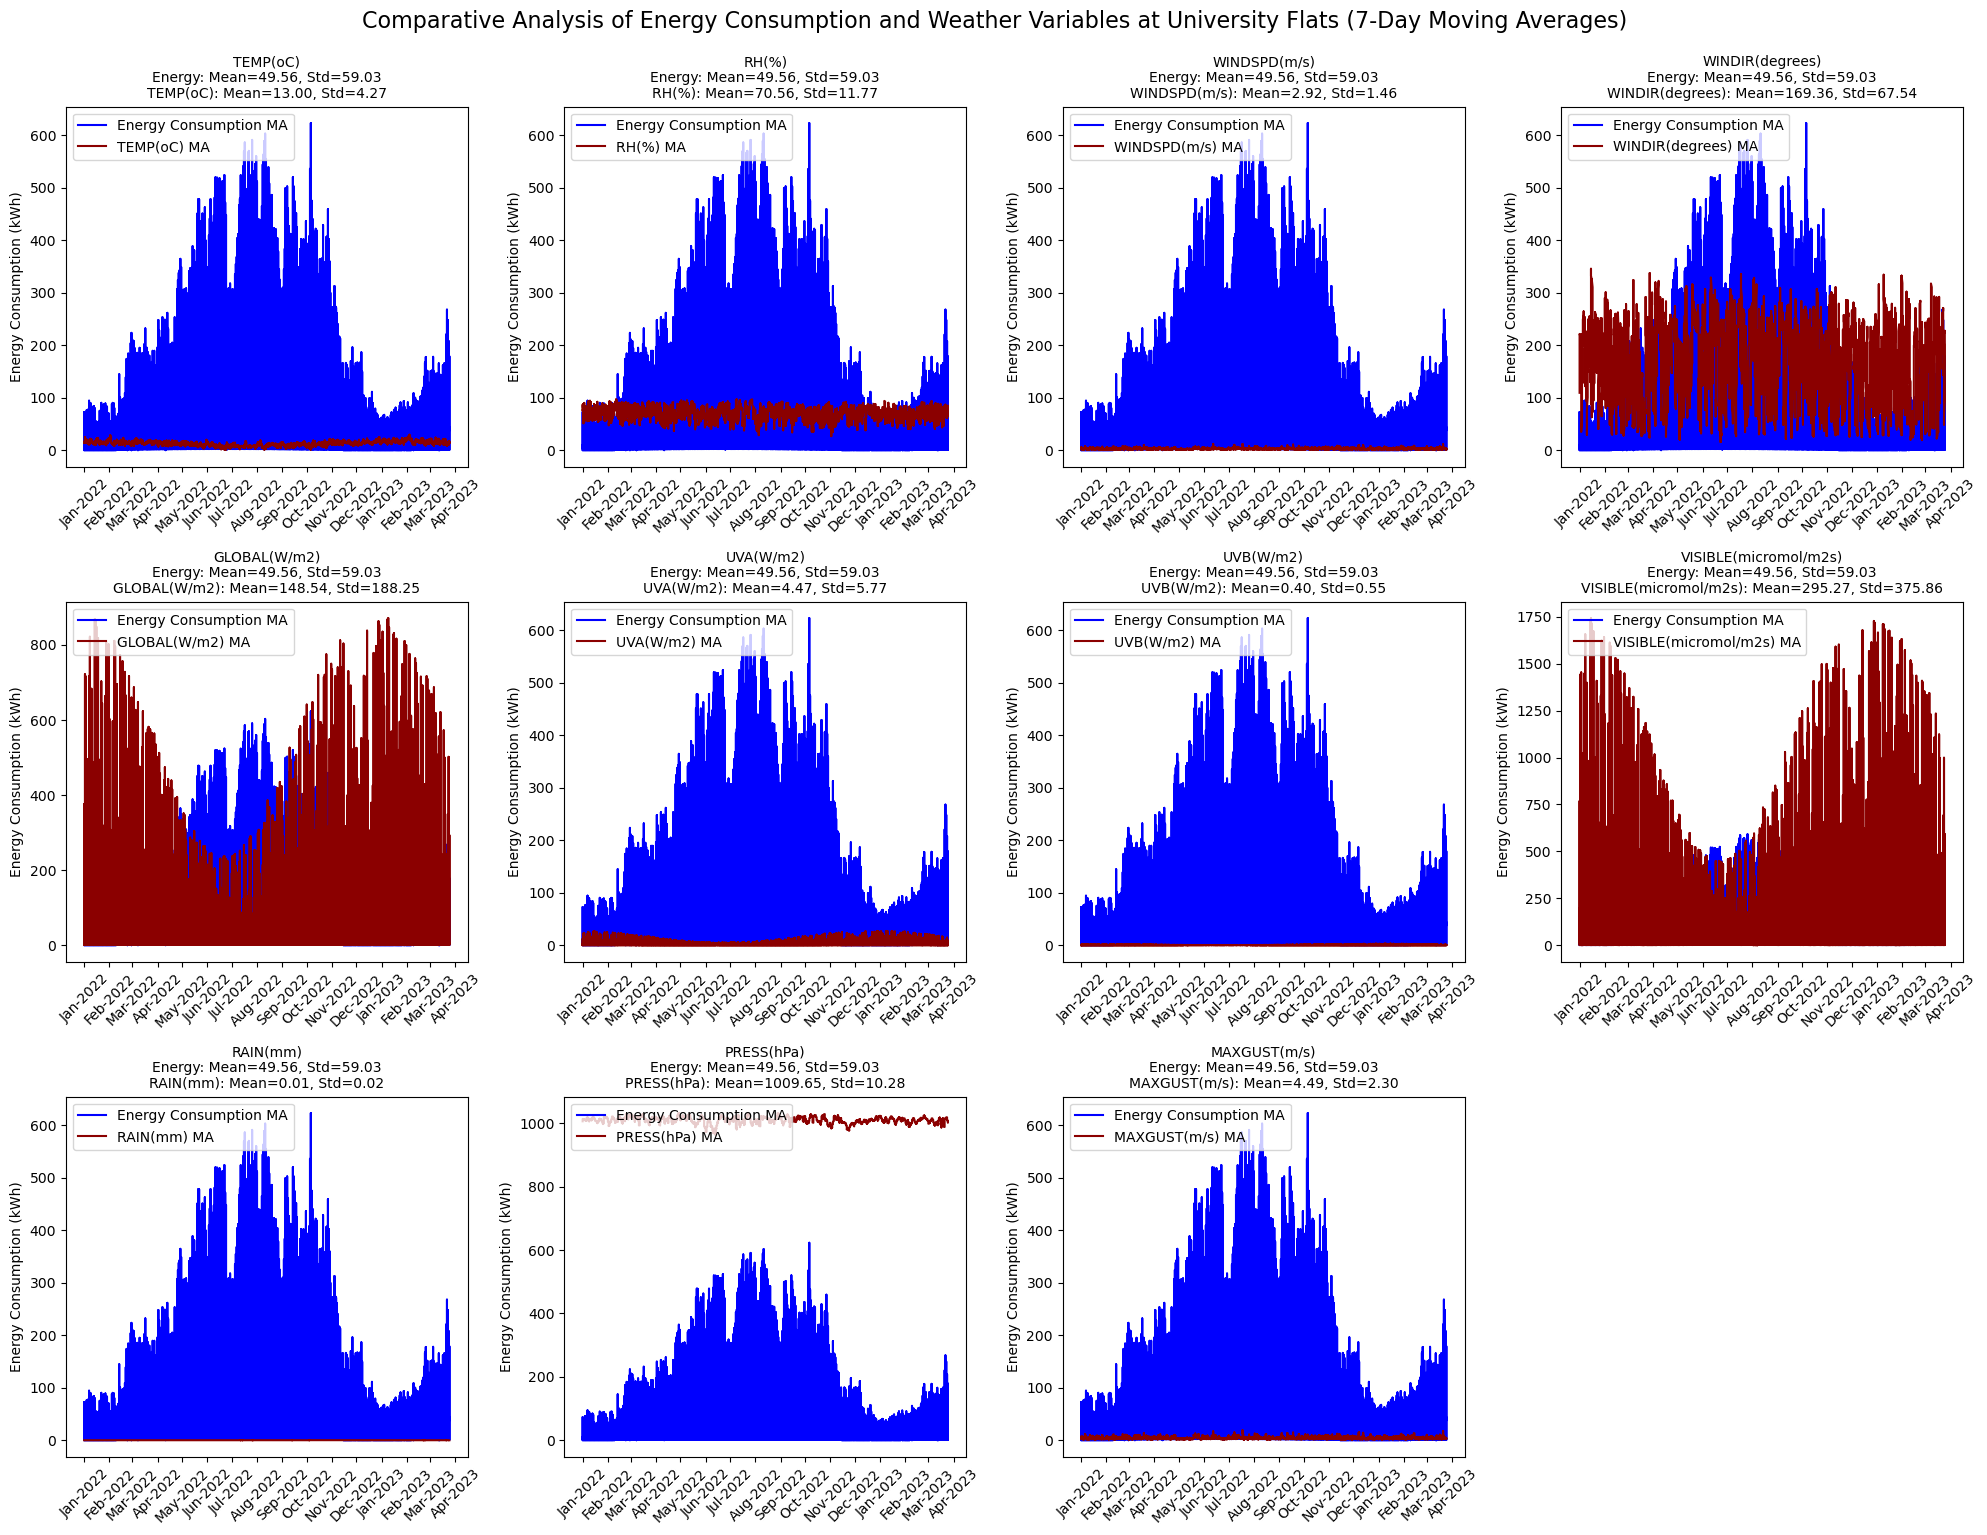

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Convert the date columns to datetime
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
weather_data['Date'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'], format='%d/%m/%Y')

# Merge the datasets on the 'Date' column
merged_data = pd.merge(energy_data, weather_data, on='Date', how='inner')

# Filter for 'Residential College in the energy dataset and create a copy
university_flats_data = merged_data[merged_data['Flats Category'] == 'Residential College'].copy()

# Choose a window size for moving average
window_size = 7  # 7 days

# Set up the subplot figure (3 rows, 4 columns)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# List of weather variables
weather_vars = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Calculate moving averages and plot each weather variable
for i, var in enumerate(weather_vars):
    university_flats_data[f'{var} MA'] = university_flats_data[var].rolling(window=window_size).mean()

    # Energy Consumption Moving Average
    energy_ma = university_flats_data['TotaldailyenergyConsumption'].rolling(window=window_size).mean()
    
    # Plot energy consumption
    axes[i].plot(university_flats_data['Date'], energy_ma, color='blue', label='Energy Consumption MA')
    axes[i].set_ylabel('Energy Consumption (kWh)')
    
    # Plot weather variable
    weather_ma = university_flats_data[f'{var} MA']
    axes[i].plot(university_flats_data['Date'], weather_ma, color='darkred', label=f'{var} MA')

    # Calculate statistics
    energy_stats = energy_ma.describe()
    weather_stats = weather_ma.describe()

    # Set title with statistics
    title = f'{var}\nEnergy: Mean={energy_stats["mean"]:.2f}, Std={energy_stats["std"]:.2f}\n'
    title += f'{var}: Mean={weather_stats["mean"]:.2f}, Std={weather_stats["std"]:.2f}'
    axes[i].set_title(title, fontsize=10)

    axes[i].legend(loc='upper left')
    axes[i].xaxis.set_major_locator(mdates.MonthLocator())
    axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    plt.setp(axes[i].get_xticklabels(), rotation=45)

# Hide the last subplot (which is empty)
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()

# Overall Title
plt.suptitle('Comparative Analysis of Energy Consumption and Weather Variables at University Flats (7-Day Moving Averages)', fontsize=16, y=1.02)

plt.show()


# Comparative Analysis of Energy Consumption by Temperature Category BOX PLOT

In [9]:
# Comments by Supervisor

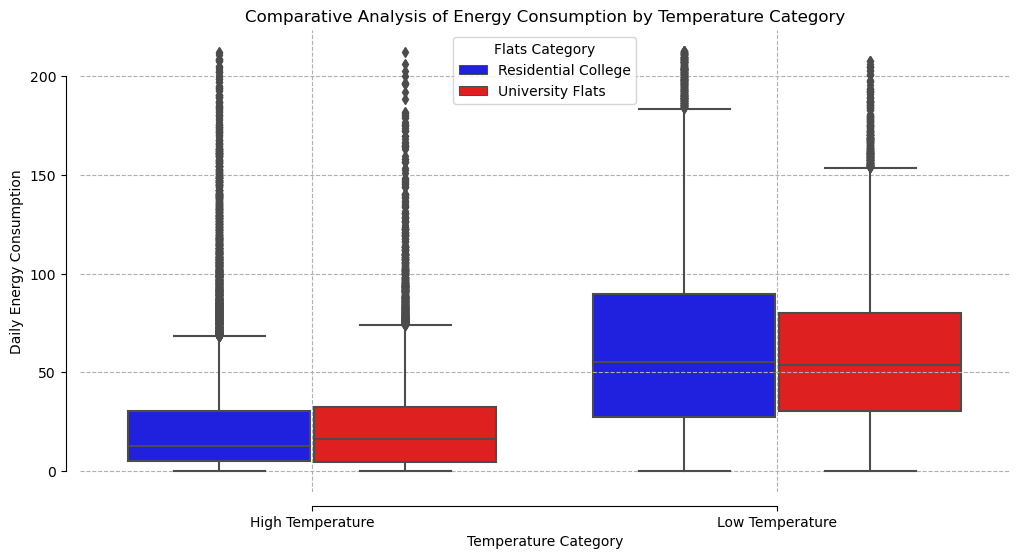

University Flats - Low Temperature: Unique Smart Meter IDs for outliers
0000002867DED9E
0000003274DE059

University Flats - High Temperature: Unique Smart Meter IDs for outliers
0000002867DED9E

Residential College - Low Temperature: Unique Smart Meter IDs for outliers
0000200385DEF37
0000002395DEE02
0000002393DEF8D
0000003838DEBE8
0000100188DE6DF
0000002399DED1C
0000003828DE145
0000002355DE9ED
0000002413DE5C5
0000003502DEB89
0000002491DE00A
0000003832DE979
0000003898DE3F7
0000201778DEDDA

Residential College - High Temperature: Unique Smart Meter IDs for outliers
0000200385DEF37
0000002393DEF8D
0000100188DE6DF
0000002395DEE02
0000002399DED1C
0000002413DE5C5



In [10]:
# Comparative Analysis of Energy Consumption by Temperature Category

# Load the energy dataset


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Convert the date columns to datetime for both datasets
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
weather_data['DATE(dd/mm/yy)'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'], format='%d/%m/%Y')

# Select only numeric columns for aggregation in weather data
numeric_cols = weather_data.select_dtypes(include=[np.number]).columns
weather_data_numeric = weather_data[['DATE(dd/mm/yy)'] + list(numeric_cols)]

# Aggregate weather data to daily averages
weather_data_daily = weather_data_numeric.groupby('DATE(dd/mm/yy)').mean().reset_index()

# Merge the energy data with the aggregated weather data
merged_data = pd.merge(energy_data, weather_data_daily, left_on='Date', right_on='DATE(dd/mm/yy)', how='inner')

# Define high and low temperature based on median value
median_temp = merged_data['TEMP(oC)'].median()
merged_data['Temp Category'] = merged_data['TEMP(oC)'].apply(lambda x: 'High Temperature' if x >= median_temp else 'Low Temperature')

# Filtering out outliers using +/- 3 standard deviations
std_dev_temp = np.std(merged_data['TEMP(oC)'])
mean_temp = np.mean(merged_data['TEMP(oC)'])
std_dev_energy = np.std(merged_data['TotaldailyenergyConsumption'])
mean_energy = np.mean(merged_data['TotaldailyenergyConsumption'])

merged_data_filtered = merged_data[
    (merged_data['TEMP(oC)'] >= mean_temp - 3*std_dev_temp) & 
    (merged_data['TEMP(oC)'] <= mean_temp + 3*std_dev_temp) &
    (merged_data['TotaldailyenergyConsumption'] >= mean_energy - 3*std_dev_energy) &
    (merged_data['TotaldailyenergyConsumption'] <= mean_energy + 3*std_dev_energy)
]

# Plotting box plots with filtered data
plt.figure(figsize=(12, 6))
sns.boxplot(x='Temp Category', y='TotaldailyenergyConsumption', hue='Flats Category', data=merged_data_filtered, 
            palette={'University Flats': 'red', 'Residential College': 'blue'}, 
            whis=1.5)
plt.title('Comparative Analysis of Energy Consumption by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Daily Energy Consumption')
plt.legend(title='Flats Category')
plt.grid(True, linestyle='--')
sns.despine(offset=10, trim=True)
plt.show()

####################################################

# Calculate the mean and standard deviation of daily energy consumption
mean_energy_consumption = merged_data['TotaldailyenergyConsumption'].mean()
std_energy_consumption = merged_data['TotaldailyenergyConsumption'].std()

# Set the threshold for outliers, commonly the mean plus 3 standard deviations
threshold_outlier = mean_energy_consumption + 3 * std_energy_consumption

# Define the median temperature to categorize 'high' and 'low' temperatures
median_temp = merged_data['TEMP(oC)'].median()

# Define categories and temperature labels
categories = ['University Flats', 'Residential College']
temp_labels = ['Low Temperature', 'High Temperature']

# Initialize a dictionary to hold the results
category_temp_ids = {
    'University Flats': {'Low Temperature': [], 'High Temperature': []},
    'Residential College': {'Low Temperature': [], 'High Temperature': []}
}

# Iterate over each flats category and temperature label
for category in categories:
    for temp_label in temp_labels:
        # Define the condition for temperature label
        if temp_label == 'Low Temperature':
            temp_condition = merged_data['TEMP(oC)'] < median_temp
        else:
            temp_condition = merged_data['TEMP(oC)'] >= median_temp
        
        # Find outliers in the specific category and temperature label
        outliers = merged_data[
            (merged_data['Flats Category'] == category) & 
            temp_condition & 
            (merged_data['TotaldailyenergyConsumption'] > threshold_outlier)
        ]
        
        # Extract unique Smart Meter IDs for these outliers
        unique_outlier_ids = outliers['Smart Meter Id'].unique()
        
        # Add the results to the dictionary
        category_temp_ids[category][temp_label] = unique_outlier_ids

# Print the results
for category in categories:
    for temp_label in temp_labels:
        print(f"{category} - {temp_label}: Unique Smart Meter IDs for outliers")
        for id in category_temp_ids[category][temp_label]:
            print(id)
        print()  # Print a newline for better readability

In [11]:
# Now, let's add statistical analysis for each temperature category within each flats category

energy_data = pd.read_csv(file_path)
weather_data = pd.read_csv(file_path)

stats_results = {}

for category in categories:
    for temp_label in temp_labels:
        # Filter data by category and temperature label
        data_subset = merged_data_filtered[
            (merged_data_filtered['Flats Category'] == category) & 
            (merged_data_filtered['Temp Category'] == temp_label)
        ]
        
        # Calculate summary statistics for the filtered data
        stats_summary = {
            'mean': np.mean(data_subset['TotaldailyenergyConsumption']),
            'std': np.std(data_subset['TotaldailyenergyConsumption']),
            'median': np.median(data_subset['TotaldailyenergyConsumption']),
            'min': np.min(data_subset['TotaldailyenergyConsumption']),
            'max': np.max(data_subset['TotaldailyenergyConsumption']),
            'count': len(data_subset)
        }
        
        # Store the results
        stats_results[(category, temp_label)] = stats_summary

# Output the statistical results
for (category, temp_label), stats in stats_results.items():
    print(f"Statistics for {category} - {temp_label}:")
    print(f"Mean: {stats['mean']}")
    print(f"Standard Deviation: {stats['std']}")
    print(f"Median: {stats['median']}")
    print(f"Min: {stats['min']}")
    print(f"Max: {stats['max']}")
    print(f"Count: {stats['count']}")
    print()  # Print a newline for better readability


Statistics for University Flats - Low Temperature:
Mean: 56.91313515524869
Standard Deviation: 36.041226646463066
Median: 53.72
Min: 0.0
Max: 207.91
Count: 24187

Statistics for University Flats - High Temperature:
Mean: 22.013365071513952
Standard Deviation: 21.90753944875409
Median: 16.13
Min: 0.0
Max: 212.3
Count: 24261

Statistics for Residential College - Low Temperature:
Mean: 62.9228960199569
Standard Deviation: 46.39684522905565
Median: 55.285
Min: 0.0
Max: 212.84
Count: 17638

Statistics for Residential College - High Temperature:
Mean: 23.655425612255907
Standard Deviation: 29.788516758957307
Median: 12.52
Min: 0.0
Max: 212.48
Count: 18538



# Comments 
For both University Flats and Residential College, energy consumption is significantly higher in lower temperatures, likely due to increased heating demands. In warmer conditions, energy use drops across both flat categories, hinting at reduced heating and lighting needs. This pattern highlights temperature's critical role in residential energy consumption.

# Comparative Analysis of Energy Consumption by Temperature Category SCATTER PLOT VERSION OF THE ABOVE

In [12]:
# Comments by Supervisor

C:\Users\HP\AppData\Local\Temp\ipykernel_14100\594113847.py:53: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(outlier_data['TEMP(oC)'], outlier_data['TotaldailyenergyConsumption'],


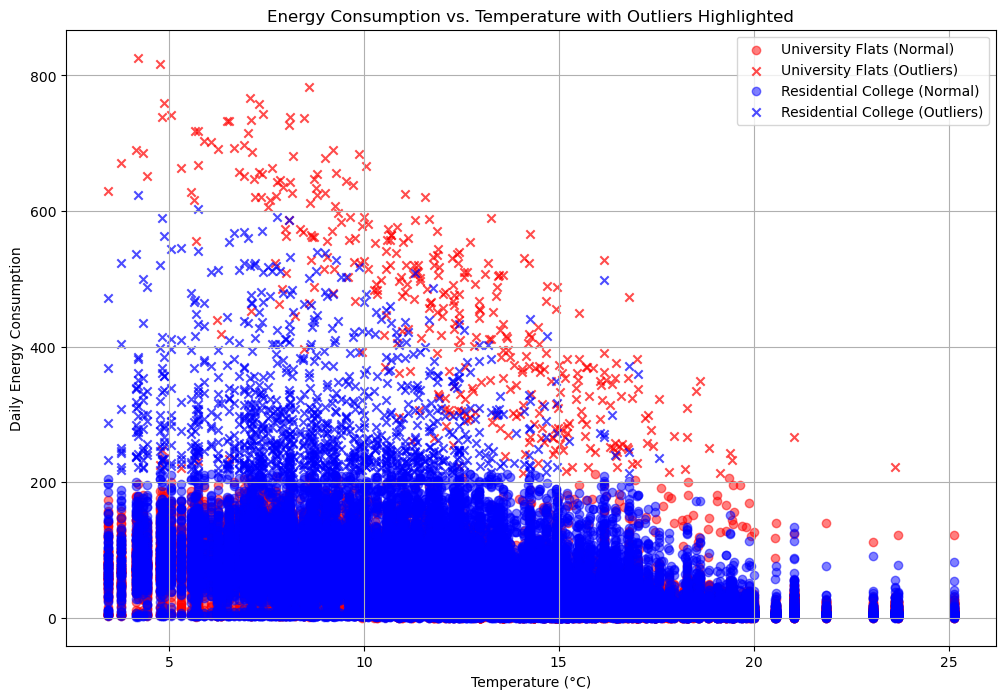

University Flats - Low Temperature: Unique Smart Meter IDs for outliers
0000002867DED9E
0000003274DE059

University Flats - High Temperature: Unique Smart Meter IDs for outliers
0000002867DED9E

Residential College - Low Temperature: Unique Smart Meter IDs for outliers
0000200385DEF37
0000002395DEE02
0000002393DEF8D
0000003838DEBE8
0000100188DE6DF
0000002399DED1C
0000003828DE145
0000002355DE9ED
0000002413DE5C5
0000003502DEB89
0000002491DE00A
0000003832DE979
0000003898DE3F7
0000201778DEDDA

Residential College - High Temperature: Unique Smart Meter IDs for outliers
0000200385DEF37
0000002393DEF8D
0000100188DE6DF
0000002395DEE02
0000002399DED1C
0000002413DE5C5



In [13]:

# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)


# Convert the date columns to datetime for both datasets
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')
weather_data['DATE(dd/mm/yy)'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'], format='%d/%m/%Y')

# Select only numeric columns for aggregation in weather data
numeric_cols = weather_data.select_dtypes(include=[np.number]).columns
weather_data_numeric = weather_data[['DATE(dd/mm/yy)'] + list(numeric_cols)]

# Aggregate weather data to daily averages
weather_data_daily = weather_data_numeric.groupby('DATE(dd/mm/yy)').mean().reset_index()

# Merge the energy data with the aggregated weather data
merged_data = pd.merge(energy_data, weather_data_daily, left_on='Date', right_on='DATE(dd/mm/yy)', how='inner')

# Define high and low temperature based on median value
median_temp = merged_data['TEMP(oC)'].median()
merged_data['Temp Category'] = merged_data['TEMP(oC)'].apply(lambda x: 'High Temperature' if x >= median_temp else 'Low Temperature')

# Calculate the mean and standard deviation of daily energy consumption
mean_energy_consumption = merged_data['TotaldailyenergyConsumption'].mean()
std_energy_consumption = merged_data['TotaldailyenergyConsumption'].std()

# Set the threshold for outliers, commonly the mean plus 3 standard deviations
threshold_outlier = mean_energy_consumption + 3 * std_energy_consumption

# Define a flag for outliers in the merged_data
merged_data['Is Outlier'] = merged_data['TotaldailyenergyConsumption'] > threshold_outlier

# Scatter plot for each category with outliers highlighted
plt.figure(figsize=(12, 8))

# Define colors for categories
colors = {'University Flats': 'red', 'Residential College': 'blue'}

# Plot each category
for category in ['University Flats', 'Residential College']:
    # Normal data
    normal_data = merged_data[(merged_data['Flats Category'] == category) & (~merged_data['Is Outlier'])]
    plt.scatter(normal_data['TEMP(oC)'], normal_data['TotaldailyenergyConsumption'], 
                alpha=0.5, label=f'{category} (Normal)', color=colors[category])

    # Outliers
    outlier_data = merged_data[(merged_data['Flats Category'] == category) & (merged_data['Is Outlier'])]
    plt.scatter(outlier_data['TEMP(oC)'], outlier_data['TotaldailyenergyConsumption'], 
                alpha=0.7, label=f'{category} (Outliers)', color=colors[category], edgecolor='black', marker='x')

plt.xlabel('Temperature (°C)')
plt.ylabel('Daily Energy Consumption')
plt.title('Energy Consumption vs. Temperature with Outliers Highlighted')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the mean and standard deviation of daily energy consumption
mean_energy_consumption = merged_data['TotaldailyenergyConsumption'].mean()
std_energy_consumption = merged_data['TotaldailyenergyConsumption'].std()

# Set the threshold for outliers, commonly the mean plus 3 standard deviations
threshold_outlier = mean_energy_consumption + 3 * std_energy_consumption

# Define the median temperature to categorize 'high' and 'low' temperatures
median_temp = merged_data['TEMP(oC)'].median()

# Define categories and temperature labels
categories = ['University Flats', 'Residential College']
temp_labels = ['Low Temperature', 'High Temperature']

# Initialize a dictionary to hold the results
category_temp_ids = {
    'University Flats': {'Low Temperature': [], 'High Temperature': []},
    'Residential College': {'Low Temperature': [], 'High Temperature': []}
}

# Iterate over each flats category and temperature label
for category in categories:
    for temp_label in temp_labels:
        # Define the condition for temperature label
        if temp_label == 'Low Temperature':
            temp_condition = merged_data['TEMP(oC)'] < median_temp
        else:
            temp_condition = merged_data['TEMP(oC)'] >= median_temp
        
        # Find outliers in the specific category and temperature label
        outliers = merged_data[
            (merged_data['Flats Category'] == category) & 
            temp_condition & 
            (merged_data['TotaldailyenergyConsumption'] > threshold_outlier)
        ]
        
        # Extract unique Smart Meter IDs for these outliers
        unique_outlier_ids = outliers['Smart Meter Id'].unique()
        
        # Add the results to the dictionary
        category_temp_ids[category][temp_label] = unique_outlier_ids

# Print the results
for category in categories:
    for temp_label in temp_labels:
        print(f"{category} - {temp_label}: Unique Smart Meter IDs for outliers")
        for id in category_temp_ids[category][temp_label]:
            print(id)
        print()  # Print a newline for better readability


# PCA - Energy Dataset

In [14]:
# Explained variance for both Flat Categories

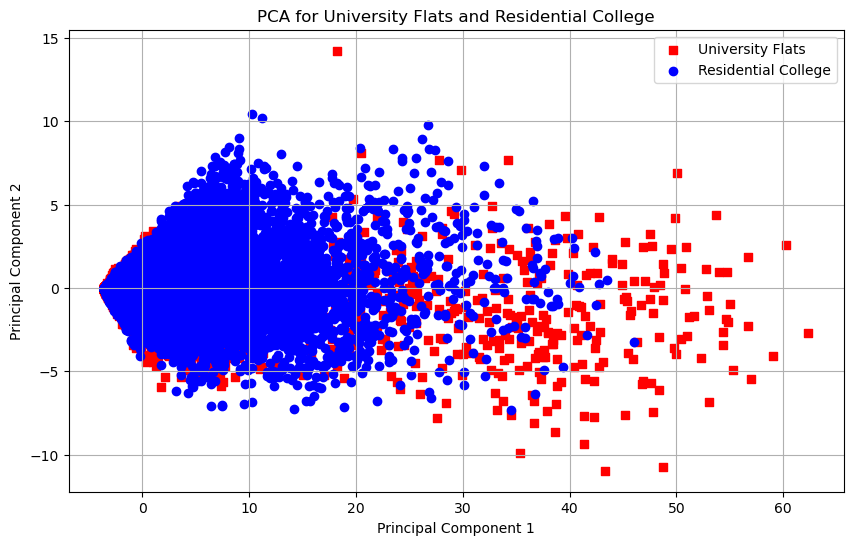

First few principal components for University Flats:
[[ 6.48020922e-01 -9.81659450e-01  2.53851315e-02 -3.65319714e-01
   6.06608717e-02 -2.27811659e-01  9.67502592e-02 -6.41946558e-02
   1.23720553e-01 -5.94001309e-02  5.11715464e-03 -4.12990324e-02
   8.28265125e-02  3.18757206e-02 -6.81816974e-02 -9.81053035e-03
  -1.00358202e-01  8.05162373e-02  3.77911693e-02 -2.08472976e-02
  -1.56650722e-02 -6.05739651e-02 -7.93175983e-05 -1.49535042e-01]
 [ 9.29941395e-02 -1.41198266e+00 -3.00507587e-03 -4.45480409e-01
   2.10764606e-02 -1.19997088e-01  2.79967684e-01 -9.52292729e-02
  -1.14972381e-02  7.55748834e-02 -1.11682196e-01  3.92648067e-02
   1.77760731e-02 -5.91203417e-02 -8.66781978e-02 -4.55739646e-02
   8.96402385e-02 -3.96237799e-02  6.08957920e-02  3.21066067e-02
   1.05729663e-01  1.05847716e-01 -4.68900090e-02 -1.25510154e-01]
 [-2.09558007e-01 -1.01981949e+00 -1.11722160e-01 -2.20429368e-01
   1.56292486e-01 -8.25828180e-02  7.01760961e-02 -3.05421592e-02
  -1.65585173e-02 -6.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)


# Correct time column names
time_columns = [
    '12.00 AM', '1.00 AM', '2.00 AM', '3.00 AM', '4.00 AM',
    '5.00 AM', '6.00 AM', '7.00 AM', '8.00 AM', '9.00 AM',
    '10.00 AM', '11.00 AM', '12.00 PM', '1.00 PM', '2.00 PM',
    '3.00 PM', '4.00 PM', '5.00 PM', '6.00 PM', '7.00 PM',
    '8.00 PM', '9.00 PM', '10.00 PM', '11.00 PM'
]

# Extracting the hourly energy consumption columns
energy_consumption_data = energy_data.loc[:, time_columns]

# Standardizing the data
scaler = StandardScaler()
energy_data_scaled = scaler.fit_transform(energy_consumption_data)

# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(energy_data_scaled)

# Separating the dataset into two categories based on 'Flats Category'
university_flats_data = principal_components[energy_data['Flats Category'] == 'University Flats']
residential_college_data = principal_components[energy_data['Flats Category'] == 'Residential College']

# Creating a combined plot
plt.figure(figsize=(10, 6))
plt.scatter(university_flats_data[:, 0], university_flats_data[:, 1], color='red', marker='s', label='University Flats')  # Red squares
plt.scatter(residential_college_data[:, 0], residential_college_data[:, 1], color='blue', marker='o', label='Residential College')  # Blue circles
plt.title('PCA for University Flats and Residential College')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the first few principal components for University Flats
print("First few principal components for University Flats:")
print(university_flats_data[:5])

# Print the first few principal components for Residential College
print("First few principal components for Residential College:")
print(residential_college_data[:5])


# COMMENTS:
The PCA scatter plot indicates significant overlap between University Flats and Residential College, suggesting similar energy consumption patterns.

The spread of data along Principal Component 1 is wider, showing it captures more variance than Principal Component 2.

There are outliers, particularly in the University Flats category, indicating some unusual consumption patterns.

The values of the principal components for both categories vary in positive and negative directions, showing diverse energy usage.

The explained variance ratio of the PCA components would be crucial to understand how much information each component captures.
Despite dimensionality reduction, the clusters are not distinctly separated, which may require additional features or different preprocessing for clarity.

# PCA Weather Dataset 

Explained variance ratio for each PCA component:
[4.39984650e-01 1.70342954e-01 1.14473985e-01 9.55440660e-02
 8.10865752e-02 5.01434750e-02 4.29986327e-02 3.79769956e-03
 1.36037440e-03 2.52271694e-04 1.53166208e-05]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.317886 -0.740626 -0.277541  0.328523 -1.179008  0.133887  0.167983   
1 -1.522938 -0.960413 -0.849150  0.444742 -0.462013  0.140115 -0.434699   
2 -1.285361 -0.012459  0.396610  0.204347 -1.228159 -0.146423 -0.243965   
3 -1.382791 -0.040629  1.242224  0.231675 -1.677978 -0.432615 -0.023471   
4 -1.516295 -0.127300  0.938907  0.247773 -1.182219 -0.488639 -0.297693   

        PC8       PC9      PC10      PC11  
0  0.034466 -0.006758 -0.013977 -0.001260  
1  0.024676  0.041297 -0.016150 -0.003544  
2  0.000619  0.202960 -0.013606 -0.002424  
3 -0.014249  0.162135 -0.011968 -0.002873  
4 -0.020640  0.104538 -0.013598 -0.003377  


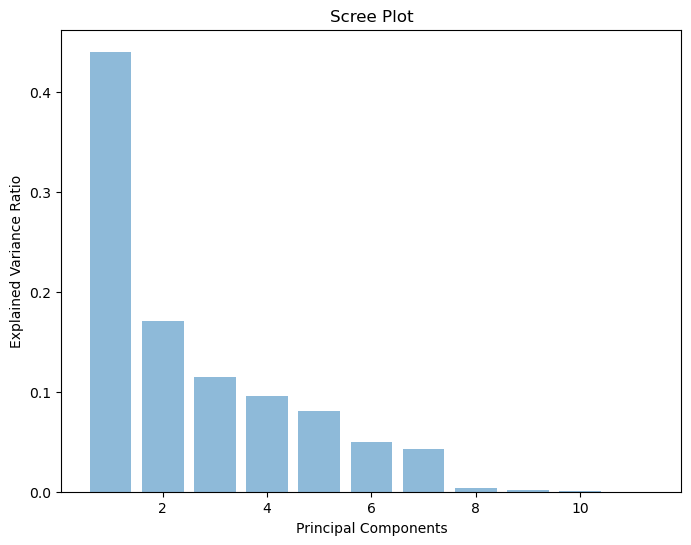

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Extracting the numeric columns for PCA
numeric_columns = [
    'TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 
    'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 
    'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)'
]
weather_data_numeric = weather_data[numeric_columns]

# Standardizing the data
scaler = StandardScaler()
weather_data_scaled = scaler.fit_transform(weather_data_numeric)

# Applying PCA
pca = PCA()
principal_components = pca.fit_transform(weather_data_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio for each component
print("Explained variance ratio for each PCA component:")
print(explained_variance_ratio)

# Create a DataFrame of the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i+1) for i in range(len(numeric_columns))])

# Display the first few rows of the PCA DataFrame for inspection
print(pca_df.head())

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


# Comments 
The PCA analysis of weather data reveals that the first three principal components account for over 72% of the variance, indicating a strong potential to reduce data complexity. The sharp decline in explained variance by subsequent components suggests limited additional information gain.

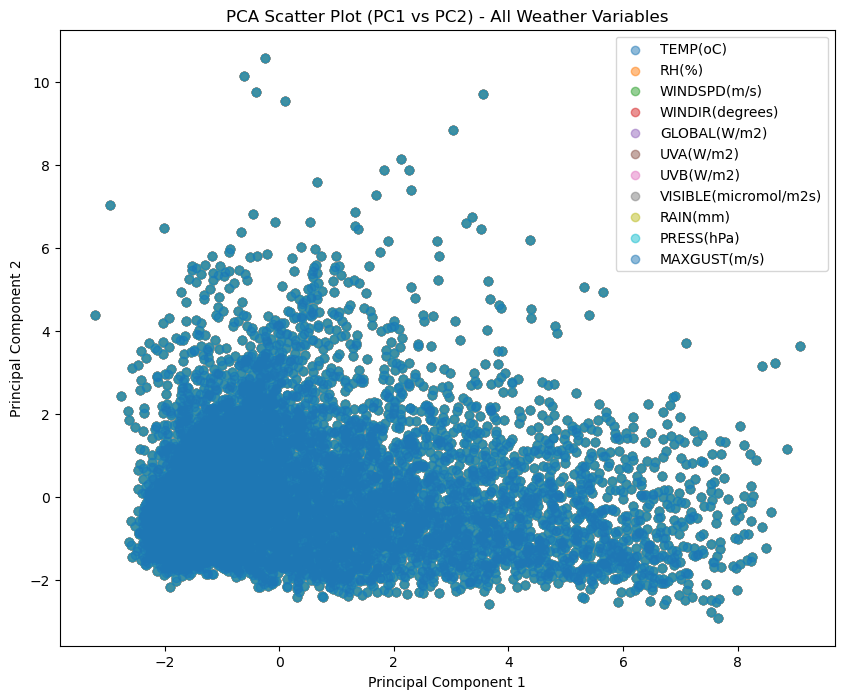

First two principal components for the first few observations:
        PC1       PC2
0 -1.317886 -0.740626
1 -1.522938 -0.960413
2 -1.285361 -0.012459
3 -1.382791 -0.040629
4 -1.516295 -0.127300


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Extracting the numeric columns for PCA including the new GUSTIME_minutes
numeric_columns = [
    'TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)',
    'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)',
    'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Standardizing and applying PCA to all weather variables together
weather_data_numeric = weather_data[numeric_columns]

scaler = StandardScaler()
weather_data_scaled = scaler.fit_transform(weather_data_numeric)

pca = PCA()
principal_components = pca.fit_transform(weather_data_scaled)

# Create a DataFrame of the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC' + str(i + 1) for i in range(len(numeric_columns))])

# Scatter plot for all weather variables in different colors
plt.figure(figsize=(10, 8))
for i, column in enumerate(numeric_columns):
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, label=column)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot (PC1 vs PC2) - All Weather Variables')
plt.legend()
plt.show()

# Print the first few entries of the principal components
print("First two principal components for the first few observations:")
print(pca_df[['PC1', 'PC2']].head())


# Comments
The PCA scatter plot reveals a broad spread along PC1, signifying diverse variance in weather variables, while PC2 indicates more specific variance. The initial observations show negative values for both components, suggesting these points are below the mean for influential weather variables. The dense center cluster points to a predominance of typical weather patterns, with sparse outliers hinting at occasional extremes

First few principal components for University Flats:
        PC1       PC2  Flats Category
0 -0.373659 -1.199521               0
1  2.207801 -0.595267               0
2  1.077136 -1.103832               0
3 -0.141206 -2.401784               0
4 -0.855828 -1.712705               0

First few principal components for Residential College:
            PC1       PC2  Flats Category
12572 -0.373659 -1.199521               1
12573  2.207801 -0.595267               1
12574  1.077136 -1.103832               1
12575 -0.141206 -2.401784               1
12576 -0.855828 -1.712705               1


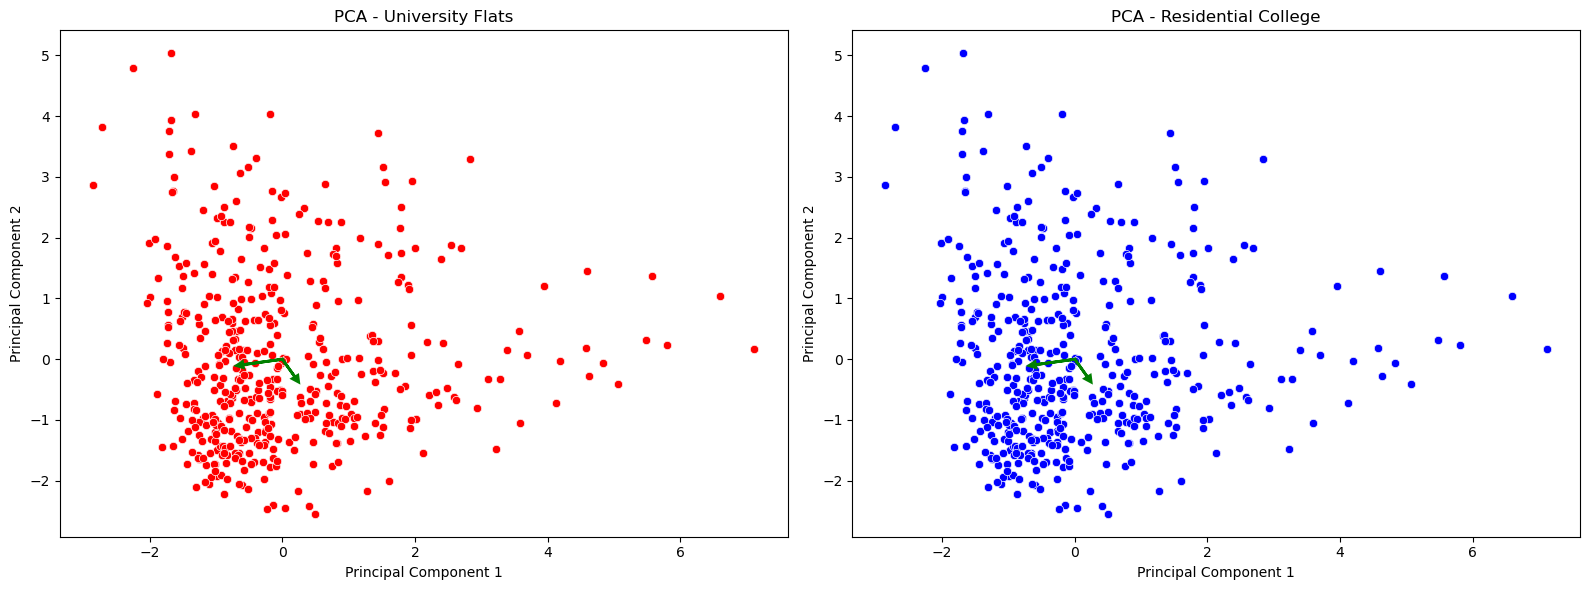

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Convert 'Date' column in energy_data to datetime format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')

# Combine 'DATE' and 'TIME' columns in weather_data and convert to datetime
weather_data['DateTime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str[:5], format='%d/%m/%Y %H.%M')
weather_data.drop(columns=['DATE(dd/mm/yy)', 'TIME'], inplace=True)

# Merge the datasets on 'Date' only
combined_data = pd.merge(energy_data, weather_data, how='left', left_on='Date', right_on='DateTime')

# Drop columns not needed for PCA
columns_to_drop = ['Smart Meter Id', 'Address', 'Street', 'Building Name', 'Building Code', 'DateTime', 'Seasons', 'Periods']
combined_data.drop(columns=columns_to_drop, inplace=True)

# Encode categorical data
combined_data['Flats Category'] = combined_data['Flats Category'].astype('category').cat.codes

# Select relevant weather features for PCA
pca_features = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Fill NaN values with mean for each column
combined_data.fillna(combined_data.mean(), inplace=True)

# Normalize these features
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data[pca_features])

# Apply PCA and get the transformed features
pca = PCA(n_components=2)
principal_components = pca.fit_transform(combined_data_scaled)
eigenvectors = pca.components_

# Creating a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Flats Category'] = combined_data['Flats Category']

# Filtering the PCA results
university_flats_pca = pca_df[combined_data['Flats Category'] == 0] # Assuming 0 represents university flats
residential_college_pca = pca_df[combined_data['Flats Category'] == 1] # Assuming 1 represents residential colleges

# Print the first few principal components for each category
print("First few principal components for University Flats:")
print(university_flats_pca.head())
print("\nFirst few principal components for Residential College:")
print(residential_college_pca.head())

# Plotting side by side with eigenvectors
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# University Flats with eigenvectors
sns.scatterplot(x='PC1', y='PC2', data=university_flats_pca, ax=axes[0], color='red')
for v in eigenvectors:
    axes[0].arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='green')
axes[0].set_title('PCA - University Flats')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Residential Colleges with eigenvectors
sns.scatterplot(x='PC1', y='PC2', data=residential_college_pca, ax=axes[1], color='blue')
for v in eigenvectors:
    axes[1].arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='green')
axes[1].set_title('PCA - Residential College')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Comments
Both categories show clear clustering in PCA, indicating distinct energy usage patterns.

Similar PC scores between categories suggest common influential factors in energy consumption.

Principal Component 1 (PC1) captures more variance, highlighting its significance in the dataset.

Principal Component 2 (PC2) has a tighter spread, indicating it captures less variance than PC1.

Identical eigenvectors for both groups indicate the PCA is based on combined data features.

The direction of eigenvectors on the plots reveals the influence of original features on the components.

Data points span negative and positive on PC1 for both groups, reflecting diverse underlying factors.

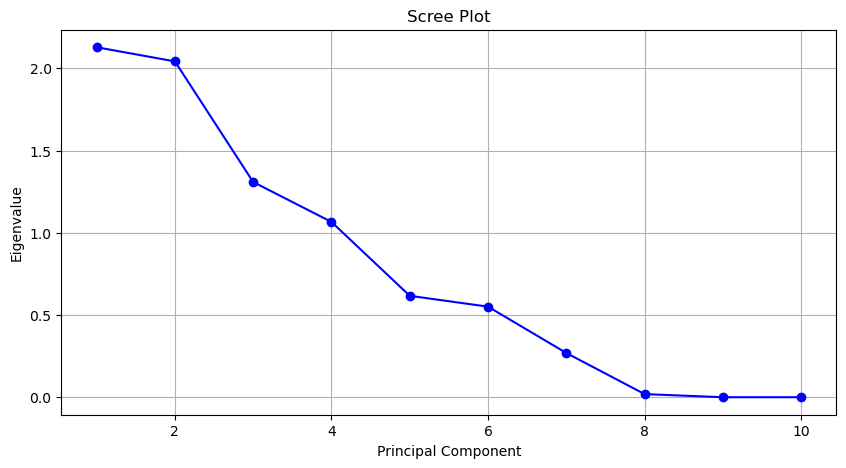

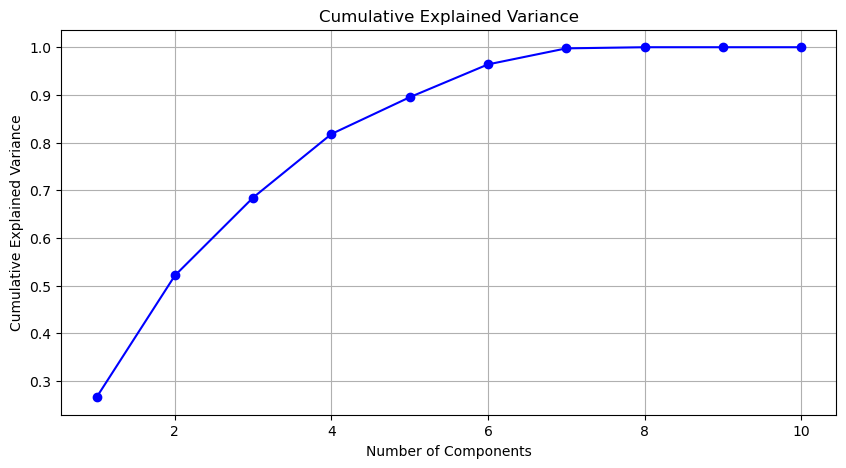

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Convert 'Date' column in energy_data to datetime format
energy_data['Date'] = pd.to_datetime(energy_data['Date'], format='%d/%m/%Y')

# Combine 'DATE' and 'TIME' columns in weather_data and convert to datetime
weather_data['DateTime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str[:5], format='%d/%m/%Y %H.%M')
weather_data.drop(columns=['DATE(dd/mm/yy)', 'TIME'], inplace=True)

# Merge the datasets on 'Date' only
combined_data = pd.merge(energy_data, weather_data, how='left', left_on='Date', right_on='DateTime')

# Drop columns not needed for PCA
columns_to_drop = ['Smart Meter Id', 'Address', 'Street', 'Building Name', 'Building Code', 'DateTime', 'Seasons', 'Periods']
combined_data.drop(columns=columns_to_drop, inplace=True)

# Encode categorical data
combined_data['Flats Category'] = combined_data['Flats Category'].astype('category').cat.codes

# Select relevant weather features for PCA
pca_features = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Fill NaN values with mean for each column
combined_data.fillna(combined_data.mean(), inplace=True)

# Normalize these features
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data[pca_features])

# Perform PCA without limiting the number of components to keep all eigenvalues
pca_full = PCA()
pca_full.fit(combined_data_scaled)

# Plot the scree plot of the eigenvalues
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_full.explained_variance_) + 1), pca_full.explained_variance_, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Optionally, you can also add the cumulative explained variance ratio plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), 
         np.cumsum(pca_full.explained_variance_ratio_), 
         marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# Comments
The scree plot shows a steep decline after the second component, indicating most variance is captured early.

The cumulative variance plot flattens after the fifth component, suggesting limited additional information gain.

An 'elbow' appears at the second component in the scree plot, indicating a good cut-off point for dimension reduction.

Cumulative explained variance surpasses 90% by the fifth component, highlighting that few components capture most information.

Using too many components could lead to overfitting by capturing noise instead of the data's underlying structure.

PCA proves efficient in dimensionality reduction, retaining significant information within the first few components.

# PCA and K-Means Clustering Analysis for Energy Consumption and Weather Patterns in University Flats and Residential Colleges

C:\Users\HP\AppData\Local\Temp\ipykernel_14100\756967306.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


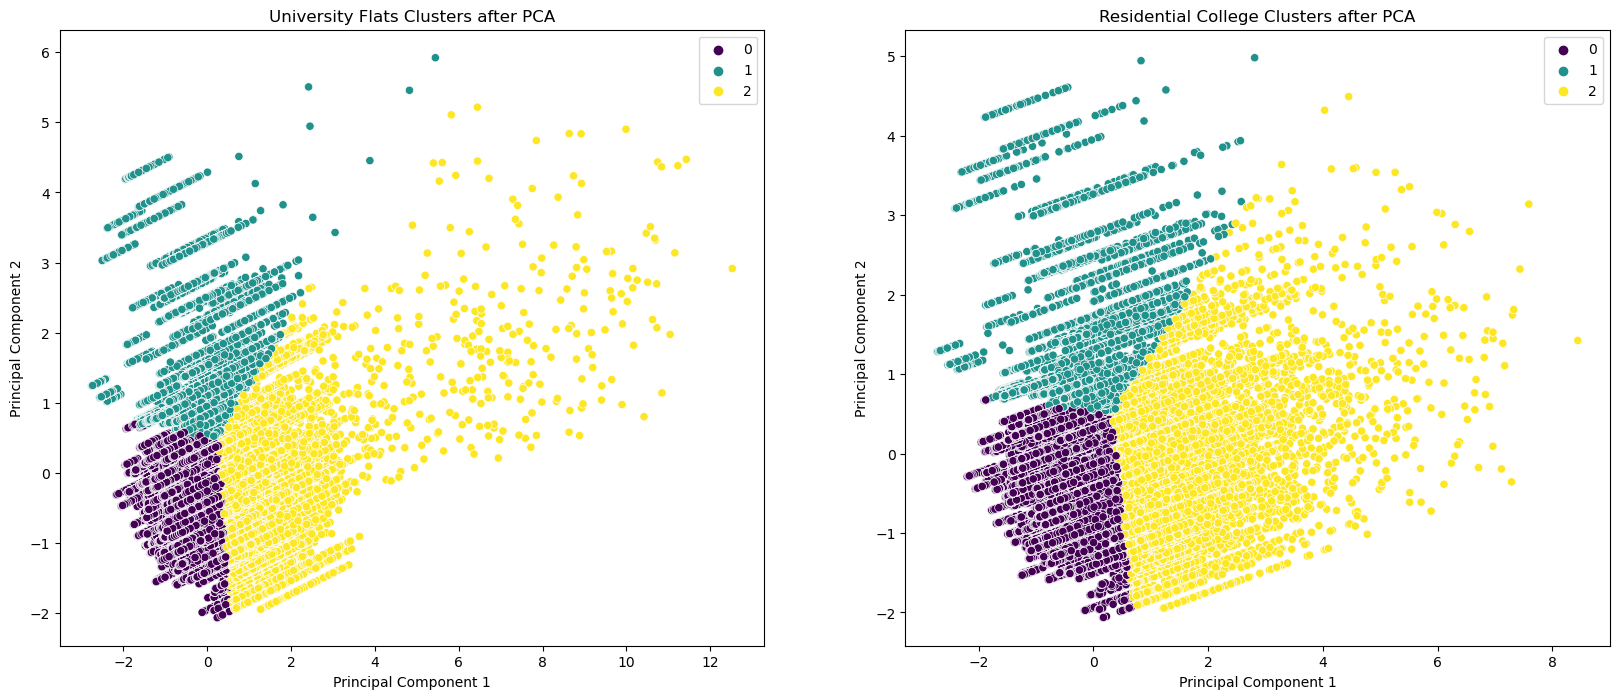

University Flats:
Explained variance by PCA components: [0.46050461 0.34533139]
Centroids of the clusters: [[-0.62302558 -0.42562754]
 [-0.41559322  1.57455256]
 [ 1.31958501 -0.18860384]]
Cluster counts: [25521  8638 14782]
Residential College:
Explained variance by PCA components: [0.47896029 0.34540183]
Centroids of the clusters: [[-0.61947286 -0.43453134]
 [-0.43593966  1.57040791]
 [ 1.49294636 -0.1292844 ]]
Cluster counts: [20406  6487 10374]


In [44]:
#######ORIGINAL CODE

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the weather data for merging
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.split('-').str[0],
                                          format='%d/%m/%Y %I.%M %p', errors='coerce', infer_datetime_format=True)

# Preprocessing the energy data for merging
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Merging the datasets on the date
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Splitting the dataset
university_flats_data = merged_data[merged_data['Flats Category'] == 'University Flats']
residential_college_data = merged_data[merged_data['Flats Category'] == 'Residential College']

# Define selected_vars based on your dataset and the columns you want to include in PCA and KMeans
selected_vars = ['TotaldailyenergyConsumption', 'TEMP(oC)', 'RH(%)']  # Example variables

# Function to apply PCA and KMeans, then return the results

def apply_pca_and_clustering(data, selected_vars, num_clusters):
    # Drop rows with missing values in selected_vars
    data = data.dropna(subset=selected_vars)

    features = data[selected_vars]
    
    # Check if there are any valid samples
    if len(features) == 0:
        print("No valid samples after handling missing values.")
        return None, None, None

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features_scaled)

    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(features_pca)

    pca_df = pd.DataFrame(features_pca, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = clusters

    return pca, kmeans, pca_df

# Apply PCA and clustering to University Flats data
pca_uf, kmeans_uf, pca_df_uf = apply_pca_and_clustering(university_flats_data, selected_vars, 3)

# Apply PCA and clustering to Residential College data
pca_rc, kmeans_rc, pca_df_rc = apply_pca_and_clustering(residential_college_data, selected_vars, 3)

# Plotting the PCA and clustering results
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# University Flats
sns.scatterplot(data=pca_df_uf, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', ax=axs[0])
axs[0].set_title('University Flats Clusters after PCA')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')
axs[0].legend()

# Residential College
sns.scatterplot(data=pca_df_rc, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', ax=axs[1])
axs[1].set_title('Residential College Clusters after PCA')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')
axs[1].legend()

plt.show()

# Print stats for University Flats
print("University Flats:")
print("Explained variance by PCA components:", pca_uf.explained_variance_ratio_)
print("Centroids of the clusters:", kmeans_uf.cluster_centers_)
print("Cluster counts:", np.bincount(pca_df_uf['Cluster']))

# Print stats for Residential College
print("Residential College:")
print("Explained variance by PCA components:", pca_rc.explained_variance_ratio_)
print("Centroids of the clusters:", kmeans_rc.cluster_centers_)
print("Cluster counts:", np.bincount(pca_df_rc['Cluster']))



# Comments
Distinct Clustering: Three distinct clusters are visible for both University Flats and Residential College, indicating clear groupings in energy consumption patterns.

Explained Variance: The first two PCA components explain over 80% of the variance for both datasets, highlighting that they capture the majority of the data's variability.

Centroid Locations: The centroids for the clusters are located in different regions of the PCA space, suggesting unique characteristics that define each cluster.

Cluster Size: University Flats have a larger number of data points in each cluster compared to Residential College, indicating a larger dataset or more variability within University Flats.

Cluster Distribution: The distribution of points within clusters shows that certain energy consumption patterns are more prevalent than others, as seen in the denser regions of the clusters.

Comparison of Clusters: The clusters' positions are similar across both categories, suggesting that the factors driving the clustering are consistent regardless of the flats' category.

Potential Anomalies: There are some data points far from the cluster centroids, especially in clusters 0 and 1, which could be anomalies or indicate a wide range of behavior within the cluster.

# Feature Selection

C:\Users\HP\AppData\Local\Temp\ipykernel_14100\2327522408.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)


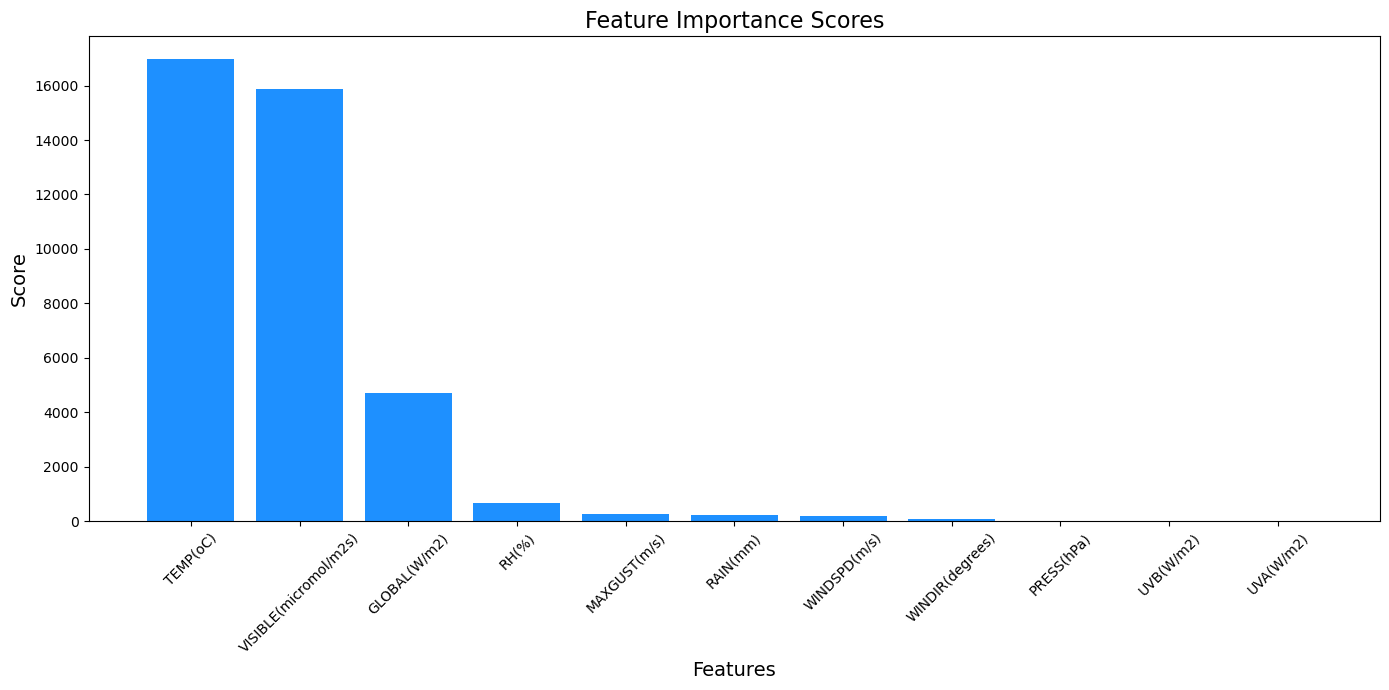

In [45]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Preprocessing the energy dataset
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Assuming the 'DATE(dd/mm/yy)' and 'TIME' columns in the weather dataset are named as such
# and replacing '.' with ':' in the 'TIME' column to correct the format
weather_data['TIME'] = weather_data['TIME'].str.replace('.', ':', regex=False)
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)

# Assuming the time format is like '1:00 PM' or '01:00 AM'
time_format = '%d/%m/%Y %I:%M %p'  # Use '%H:%M' if your time is in 24-hour format

# Then parse the datetime with the explicit format
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.replace('.', ':', regex=False), format=time_format)


# Merge the datasets on the datetime columns
# This assumes that the weather_data has already been aggregated to daily data to match the energy_data frequency
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime', how='left')

# Select the target variable from the energy dataset
y = merged_data['TotaldailyenergyConsumption']

# Select features from the weather dataset
X_weather = merged_data[['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']].dropna()

# Use SelectKBest to select the most influential weather features
k = 'all'  # Use 'all' to select all features, you can set this to any number if you want to reduce the number of features
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_weather, y)

# Get the scores for each feature
feature_scores = selector.scores_

# Combine the scores with the column names
features_scores_df = pd.DataFrame({'Feature': X_weather.columns, 'Score': feature_scores})

# Sort the dataframe by score in descending order for better visualization
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 7))
plt.bar(features_scores_df['Feature'], features_scores_df['Score'], color='dodgerblue')

# Add labels and title
plt.xlabel('Features', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.title('Feature Importance Scores', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()


# silhouette scores for Flats Category

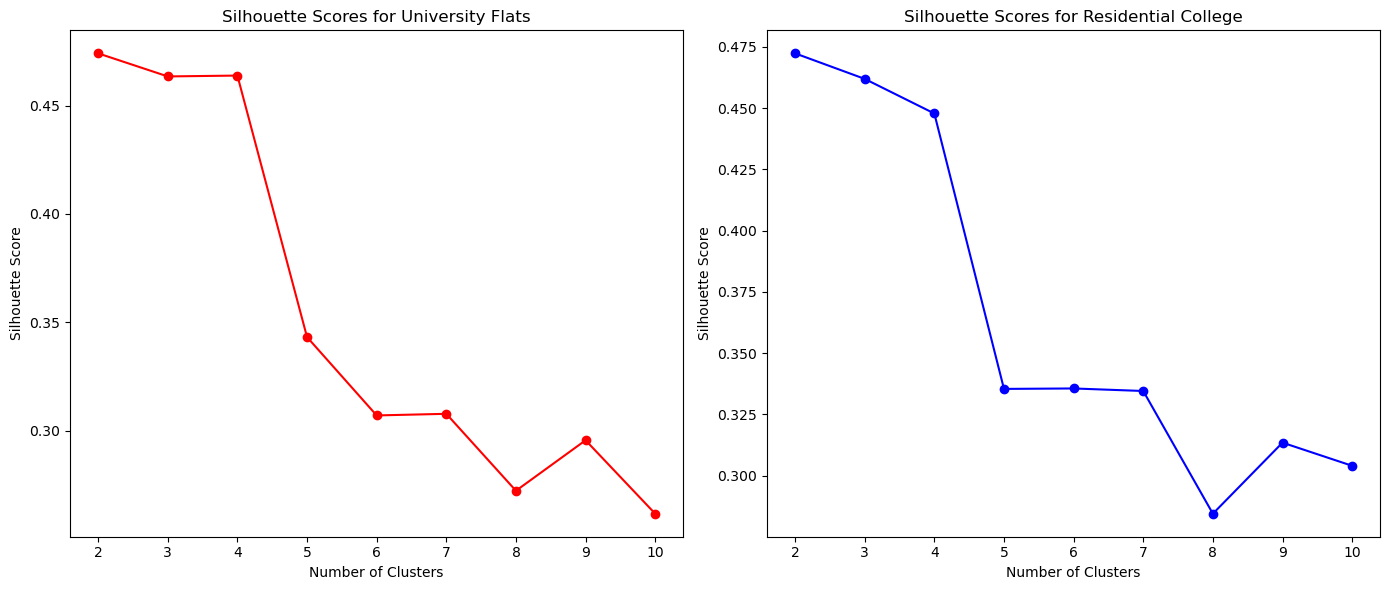

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Local\Temp\ipykernel_14100\2326648563.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university_flats_data['Cluster'] = uf_clusters
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         TotaldailyenergyConsumption   TEMP(oC)  GLOBAL(W/m2)  \
Cluster                                                         
0                         473.214749  10.495752      0.816726   
1                          23.415879  13.901481      0.802561   
2                          66.577626   6.976098      0.902728   
3                          67.415804   8.236339      0.808964   

         VISIBLE(micromol/m2s)  
Cluster                         
0                     0.867316  
1                     0.011806  
2                     1.869611  
3                     1.618047  
         TotaldailyenergyConsumption   TEMP(oC)  GLOBAL(W/m2)  \
Cluster                                                         
0                          23.598734  13.945748      0.802477   
1                          67.548097   8.300224      0.808767   
2                          78.435803   6.958240      0.903934   
3                         241.532894   8.561000      0.817218   

         VISIBLE(mic

C:\Users\HP\AppData\Local\Temp\ipykernel_14100\2326648563.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_college_data['Cluster'] = rc_clusters


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Parse the date and time columns
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True, format='%d/%m/%Y %I.%M %p')

# Merging the datasets on the datetime
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Splitting the dataset into University Flats and Residential College
university_flats_data = merged_data[merged_data['Flats Category'] == 'University Flats']
residential_college_data = merged_data[merged_data['Flats Category'] == 'Residential College']

# Selecting features for PCA and clustering
selected_vars = ['TotaldailyenergyConsumption', 'TEMP(oC)', 'GLOBAL(W/m2)', 'VISIBLE(micromol/m2s)'] 

# Standardizing the features
scaler = StandardScaler()
uf_features = university_flats_data[selected_vars]
rc_features = residential_college_data[selected_vars]
uf_features_scaled = scaler.fit_transform(uf_features.dropna())
rc_features_scaled = scaler.fit_transform(rc_features.dropna())

# Function to calculate silhouette scores
def calculate_silhouette_scores(data, max_clusters, n_init_val=10):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=n_init_val, random_state=42)
        clusters = kmeans.fit_predict(data)
        score = silhouette_score(data, clusters)
        silhouette_scores.append((n_clusters, score))
    return silhouette_scores

# Calculating silhouette scores
max_clusters = 10  # You can adjust this value
uf_silhouette_scores = calculate_silhouette_scores(uf_features_scaled, max_clusters)
rc_silhouette_scores = calculate_silhouette_scores(rc_features_scaled, max_clusters)

# Plotting the silhouette scores
plt.figure(figsize=(14, 6))

# Plot for University Flats
uf_scores = [score for _, score in uf_silhouette_scores]
uf_cluster_numbers = [n_clusters for n_clusters, _ in uf_silhouette_scores]
plt.subplot(1, 2, 1)
plt.plot(uf_cluster_numbers, uf_scores, marker='o', color='red')
plt.title('Silhouette Scores for University Flats')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot for Residential College
rc_scores = [score for _, score in rc_silhouette_scores]
rc_cluster_numbers = [n_clusters for n_clusters, _ in rc_silhouette_scores]
plt.subplot(1, 2, 2)
plt.plot(rc_cluster_numbers, rc_scores, marker='o', color='blue')
plt.title('Silhouette Scores for Residential College')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Now, let's choose an optimal number of clusters from the silhouette analysis and perform K-means clustering
optimal_clusters = 4  # For example, let's choose 4 as an optimal number based on the silhouette analysis

# Clustering for University Flats
kmeans_uf = KMeans(n_clusters=optimal_clusters, random_state=42)
uf_clusters = kmeans_uf.fit_predict(uf_features_scaled)
university_flats_data['Cluster'] = uf_clusters

# Clustering for Residential College
kmeans_rc = KMeans(n_clusters=optimal_clusters, random_state=42)
rc_clusters = kmeans_rc.fit_predict(rc_features_scaled)
residential_college_data['Cluster'] = rc_clusters

# We can now analyze the clusters, their centroids, and the distribution of data points within each cluster.
# For example, let's look at the mean values of each variable in each cluster for University Flats.
uf_clustered_data = university_flats_data[selected_vars + ['Cluster']]
uf_cluster_summary = uf_clustered_data.groupby('Cluster').mean()
print(uf_cluster_summary)

# Similarly for Residential College
rc_clustered_data = residential_college_data[selected_vars + ['Cluster']]
rc_cluster_summary = rc_clustered_data.groupby('Cluster').mean()
print(rc_cluster_summary)


# Comments 
Optimal Number of Clusters:

For University Flats, a two-cluster solution is suggested by the silhouette scores, indicating two predominant energy usage patterns. Residential College data also initially favors a two-cluster solution but exhibits a potential for additional sub-patterns as suggested by variable silhouette scores with more clusters.
Energy Consumption Patterns:

Energy usage in University Flats appears to be higher in colder temperatures, particularly in Cluster 0, likely due to heating demands. Conversely, Clusters 1 and 3, with lower energy consumption, suggest less need for temperature control, possibly due to milder weather. Residential College follows a similar trend, with the highest energy consumption associated with cooler temperatures.
Influence of Weather Variables:

Temperature (TEMP(oC)) shows a consistent relationship with energy consumption across clusters, reinforcing its role as a key determinant of heating and cooling needs. In contrast, variables such as GLOBAL(W/m2) and VISIBLE(micromol/m2s) do not display significant variations across clusters, hinting at a lesser impact on energy consumption patterns within the observed dataset.a

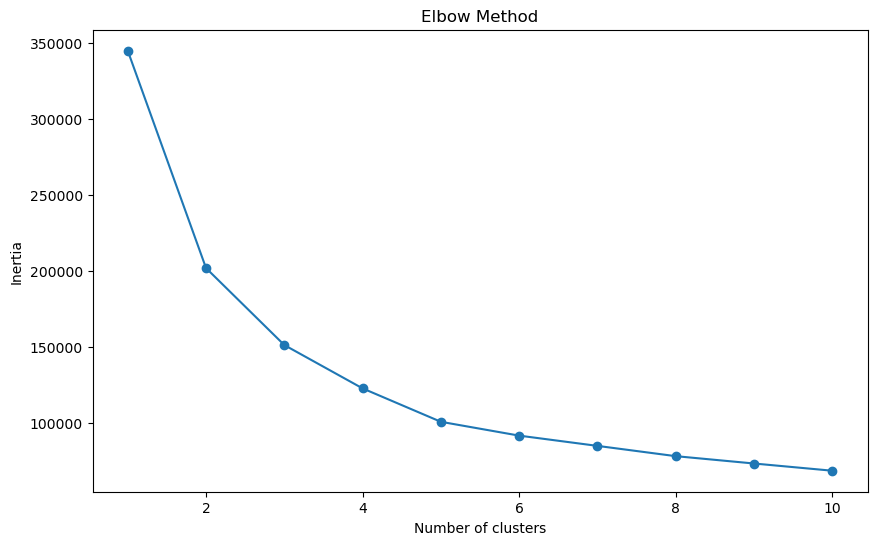

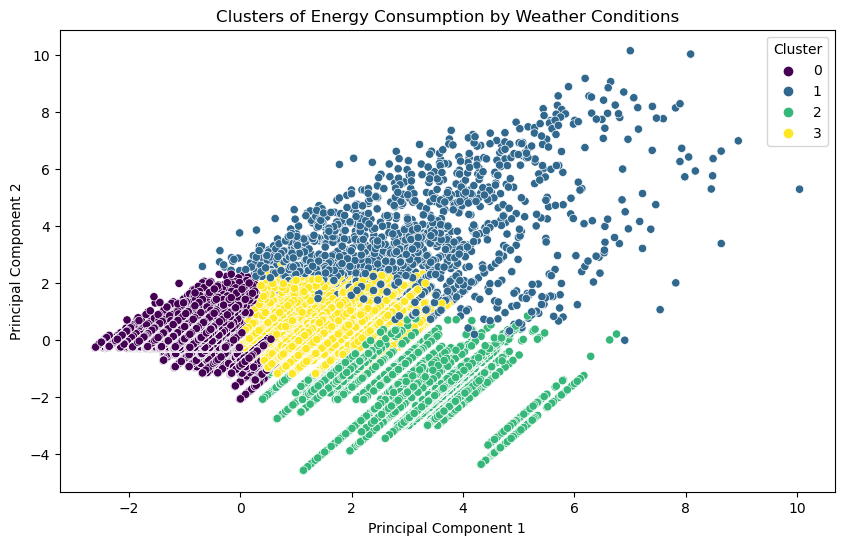

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt


# Load the energy dataset
file_path = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path)

# Load the weather dataset
file_path = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path)

# Merge the datasets assuming they have been properly combined into 'merged_data'

# Selecting relevant features for clustering based on the silhouette scores
clustering_features = merged_data[['TEMP(oC)', 'VISIBLE(micromol/m2s)', 'GLOBAL(W/m2)', 'TotaldailyenergyConsumption']].dropna()

# Normalizing the features
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Choosing the number of clusters with the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)  # Set n_init explicitly to suppress the warning
    kmeans.fit(clustering_features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-means clustering with the chosen number of clusters
# Let's assume the elbow is at 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)  # Set n_init explicitly to suppress the warning
clusters = kmeans.fit_predict(clustering_features_scaled)

# Adding the cluster labels to our dataframe
clustering_features['Cluster'] = clusters

# Visualizing the clusters
# Reducing dimensions to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
clustering_features_pca = pca.fit_transform(clustering_features_scaled)

# Corrected scatter plot for the clusters using keyword arguments
plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustering_features_pca[:, 0], y=clustering_features_pca[:, 1], hue=clustering_features['Cluster'], palette='viridis')
plt.title('Clusters of Energy Consumption by Weather Conditions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# DBSCAN Clustering on PCA-Transformed Data for Flat Categories

University Flats:
PCA Explained Variance Ratio: [0.46050461 0.34533139]
Estimated number of clusters: 2
Estimated number of noise points: 39

Residential College:
PCA Explained Variance Ratio: [0.47896029 0.34540183]
Estimated number of clusters: 2
Estimated number of noise points: 10


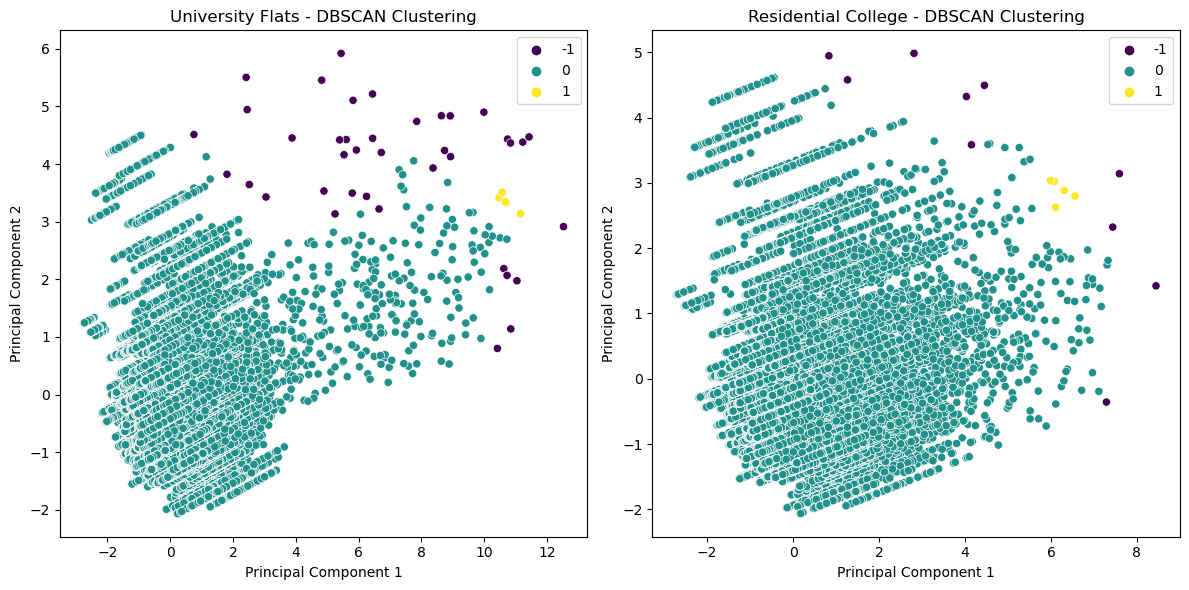

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the energy dataset
file_path_energy = 'C://Users//HP//Desktop//INFO501//PROCESSED-Energy-Dataset-192-FINAL.csv'
energy_data = pd.read_csv(file_path_energy)

# Load the weather dataset
file_path_weather = 'C://Users//HP//Desktop//INFO501//Hourly-Weather-Data-Final.csv'
weather_data = pd.read_csv(file_path_weather)

# Convert 'Date' to datetime format and merge datasets
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)
# Use the 'TIME' column for the time part and format it correctly
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], format='%d/%m/%Y %I.%M %p')
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime')

# Splitting the dataset into University Flats and Residential College
university_flats_data = merged_data[merged_data['Flats Category'] == 'University Flats']
residential_college_data = merged_data[merged_data['Flats Category'] == 'Residential College']

# Selecting features for PCA and clustering
selected_vars = ['TotaldailyenergyConsumption', 'TEMP(oC)', 'RH(%)']  # Add or modify as needed

# Function to apply PCA and DBSCAN clustering
def apply_pca_dbscan(data, features):
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(data[features])
    
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features_scaled)

    dbscan = DBSCAN(eps=0.5, min_samples=5)
    clusters = dbscan.fit_predict(features_pca)

    # Print the explained variance ratio of PCA
    print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

    # Print DBSCAN cluster statistics
    n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise_ = list(clusters).count(-1)
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)

    return features_pca, clusters

# Applying PCA and DBSCAN clustering to both categories
print("University Flats:")
uf_pca, uf_clusters = apply_pca_dbscan(university_flats_data, selected_vars)
print("\nResidential College:")
rc_pca, rc_clusters = apply_pca_dbscan(residential_college_data, selected_vars)

# Visualization
plt.figure(figsize=(12, 6))

# University Flats
plt.subplot(1, 2, 1)
sns.scatterplot(x=uf_pca[:, 0], y=uf_pca[:, 1], hue=uf_clusters, palette='viridis')
plt.title('University Flats - DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Residential College
plt.subplot(1, 2, 2)
sns.scatterplot(x=rc_pca[:, 0], y=rc_pca[:, 1], hue=rc_clusters, palette='viridis')
plt.title('Residential College - DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()
